In [1]:
#! pip install --upgrade pip
# ! pip install kmodes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

import numpy as np
from kmodes.kprototypes import KPrototypes

In [3]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
    # dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])


encoded_cluster_2016 = cluster_2016.copy()
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [4]:
cluster_2016['VEHICLE_HAL_ID'].unique()

array([108647, 108371, 119829, ..., 110310, 107219, 108927])

In [5]:
len(cluster_2016['VEHICLE_HAL_ID'].unique())

10001

In [6]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [7]:
cluster_2016['Month'].unique()

array([1, 2, 3, 4, 5, 6])

In [8]:
cluster_2016['CITY_RENTAL_ZONE'].unique()

array(['Hamburg', 'Kassel', 'Darmstadt', 'Frankfurt am Main', 'Marburg',
       'Berlin', 'Stuttgart', 'Köln', 'München', 'Wiesbaden',
       'Rüsselsheim', 'Weimar', 'Mannheim', 'Karlsruhe', 'Bonn', 'Halle',
       'Lübeck', 'Baden-Baden', 'Bamberg', 'Göttingen',
       'Flugh. Frankfurt', 'Oberhausen', 'Freiburg', 'Kiel', 'Würzburg',
       'Erlangen', 'Düsseldorf', 'Fulda', 'Troisdorf', 'Oldenburg (Oldb)',
       'Heidelberg', 'Warnemünde', 'Gütersloh', 'Bremen', 'Mainz',
       'Saarbrücken', 'Hannover', 'Aschaffenburg', 'Rostock', 'Hanau',
       'Ingolstadt', 'Braunschweig', 'Magdeburg', 'Kaiserslautern',
       'Bielefeld'], dtype=object)

In [9]:
#! pip install kmodes
#! pip install --upgrade pip

# Implementation

In [10]:
# converting all categorcal variable to dummy encoding

encoded_cluster_2016['CITY_RENTAL_ZONE_encoded']=encoded_cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
encoded_cluster_2016['TECHNICAL_INCOME_CHANNEL_encoded']=encoded_cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes


In [11]:
encoded_cluster_2016.head(100)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,CITY_RENTAL_ZONE_encoded,TECHNICAL_INCOME_CHANNEL_encoded
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1,18,0
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1,18,4
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1,18,4
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1,18,5
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1,18,0
5,117442,Hauptbahnhof / Rainer-Dierichs-Platz,204812.0,Uni-Kassel / Diagonale,204815.0,Kassel,Android,11.116667,1,25,0
6,107059,Darmstadt Hbf,128496.0,Darmstadtium,246251.0,Darmstadt,iPhone,15.050000,1,8,4
7,107059,Darmstadtium,246251.0,Sievekingsallee/Sievekingdamm,244936.0,Darmstadt,iPhone,10.666667,1,8,4
8,119362,Alter Wall/Adolphsbrücke,158204.0,Sievekingsallee/Sievekingdamm,244936.0,Hamburg,iPhone,17.466667,1,18,4
9,109225,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,IVR,8.866667,1,18,2


In [12]:
encoded_cluster_2016[encoded_cluster_2016['CITY_RENTAL_ZONE']=='Hamburg'].head(200)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,CITY_RENTAL_ZONE_encoded,TECHNICAL_INCOME_CHANNEL_encoded
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1,18,0
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1,18,4
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1,18,4
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1,18,5
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1,18,0
8,119362,Alter Wall/Adolphsbrücke,158204.0,Sievekingsallee/Sievekingdamm,244936.0,Hamburg,iPhone,17.466667,1,18,4
9,109225,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,IVR,8.866667,1,18,2
10,120164,Allende-Platz/Grindelhof,198077.0,Feldstraße / Marktstraße,244093.0,Hamburg,others,8.516667,1,18,5
11,120164,Harvestehuder Weg / Alte Rabenstraße,137994.0,Harvestehuder Weg / Alte Rabenstraße,137994.0,Hamburg,others,0.500000,1,18,5
13,108894,Kellinghusenstraße / Loogeplatz,140795.0,Goebenstraße/Eppendorfer Weg,131641.0,Hamburg,IVR,31.216667,1,18,2


In [13]:
# drop other catgorical columns
encoded_cluster_2016 = encoded_cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE','CITY_RENTAL_ZONE','TECHNICAL_INCOME_CHANNEL'])

In [14]:
encoded_cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,Ride_Duration_new,Month,CITY_RENTAL_ZONE_encoded,TECHNICAL_INCOME_CHANNEL_encoded
0,108647,213687.0,213855.0,28.800000,1,18,0
1,108371,138379.0,140796.0,27.050000,1,18,4
2,119829,131879.0,131873.0,11.216667,1,18,4
3,116810,138378.0,140795.0,75.383333,1,18,5
4,120345,131883.0,244093.0,8.983333,1,18,0


In [15]:
# To convert the value into numpy array

encoded_cluster_2016 = encoded_cluster_2016.iloc[:, 0:].values

In [16]:
# printing the first array of features

encoded_cluster_2016[0]

array([1.08647e+05, 2.13687e+05, 2.13855e+05, 2.88000e+01, 1.00000e+00,
       1.80000e+01, 0.00000e+00])

In [18]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kproto = KPrototypes(n_clusters=7, init='Cao', verbose=2)

# fit the data in numpy array format , and given all the  categorical features index
clusters = kproto.fit(encoded_cluster_2016, categorical=[0, 1, 2, 5,6])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.n_iter_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

In [17]:
# save the model to disk
import pickle

In [18]:
# creating a file that can save the model
filename = 'kproto1.sav'

In [21]:
# save the model in the file
pickle.dump(kproto, open(filename, 'wb'))

In [19]:
# load the model from disk for faster implementation
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.cost_)

23548461978.530243


# Prediction

### features :
* VEHICLE_HAL_ID
* START_RENTAL_ZONE_HAL_ID
* END_RENTAL_ZONE_HAL_ID
* Ride_Duration_new
* Month
* CITY_RENTAL_ZONE_encoded
* TECHNICAL_INCOME_CHANNEL_encoded



### For prediction features value use : 

* VEHICLE_HAL_ID =  117442
* START_RENTAL_ZONE_HAL_ID = Millerntorplatz/St.Pauli (131905)
* END_RENTAL_ZONE_HAL_ID =  Neuer Pferdemarkt / Beim Grünen Jäger (131890)
* Ride_Duration_new = 120
* Month = 4 
* CITY_RENTAL_ZONE_encoded = Hamburg (18)
* TECHNICAL_INCOME_CHANNEL_encoded = Android (0)

In [20]:
# for predict a new data points with index of categorical value
# it predict the cluster number

loaded_model.predict(np.array([[117442, 131905, 131890, 120,
       4, 18, 0]]),categorical=[0, 1, 2, 5,6])

array([5], dtype=uint8)

In [21]:
print(kproto.cost_)

NameError: name 'kproto' is not defined

In [22]:
print(loaded_model.cluster_centroids_)

# Print training statistics
print(loaded_model.cost_)
print(loaded_model.n_iter_)

[array([[1.20068985e+03, 3.72653901e+00],
       [1.40225777e+04, 3.89247312e+00],
       [9.31515104e+04, 2.00000000e+00],
       [4.04251568e+03, 3.69448095e+00],
       [6.28360000e+05, 2.33333333e+00],
       [1.87674090e+01, 3.61352391e+00],
       [4.12483184e+04, 3.92105263e+00]]), array([[1.20825e+05, 2.14419e+05, 2.14419e+05, 1.80000e+01, 4.00000e+00],
       [1.13542e+05, 3.04300e+04, 3.04300e+04, 1.80000e+01, 4.00000e+00],
       [1.10994e+05, 6.76000e+03, 6.15600e+03, 1.20000e+01, 2.00000e+00],
       [1.19238e+05, 1.42638e+05, 1.42638e+05, 1.80000e+01, 4.00000e+00],
       [1.43417e+05, 1.31653e+05, 2.18174e+05, 1.20000e+01, 0.00000e+00],
       [1.08235e+05, 1.98077e+05, 1.98077e+05, 1.80000e+01, 4.00000e+00],
       [1.06779e+05, 1.14278e+05, 2.54126e+05, 3.00000e+00, 0.00000e+00]])]
23548461978.530243
38


In [23]:
# To predict on new data points

loaded_model.predict(np.array([[117442, 131905, 131890, 120,
       4, 18, 0]]),categorical=[0, 1, 2, 5,6])

array([5], dtype=uint8)

In [24]:
# Predicted cluster level on existing dataset
final = loaded_model.labels_
np.unique(final)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [25]:
# total data
loaded_model.labels_.shape

(2000000,)

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(encoded_cluster_2016)

In [27]:
%matplotlib inline

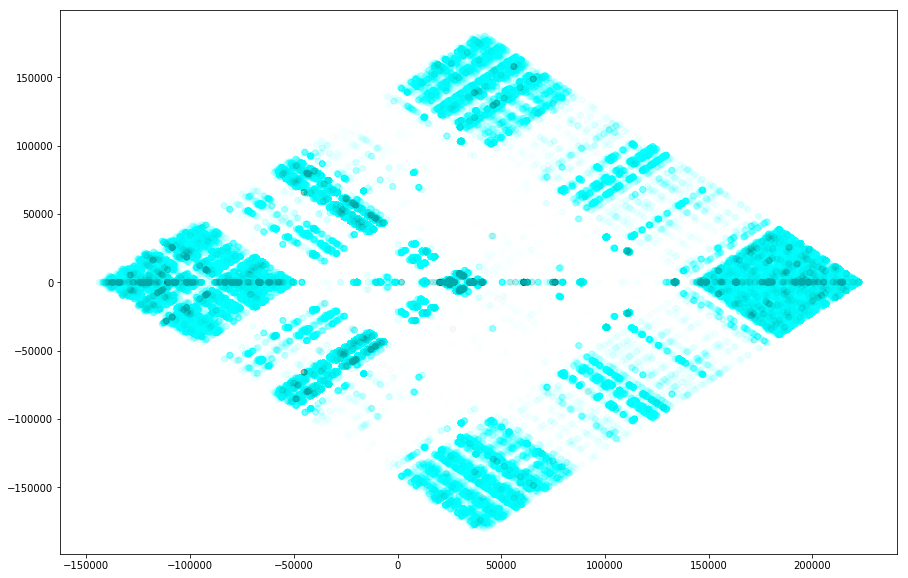

In [28]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in loaded_model.labels_] ,label = loaded_model.labels_, alpha=0.01)
plt.show()

In [29]:
plt.savefig('kproto2.png')

<Figure size 432x288 with 0 Axes>

In [30]:
labels = [colors[l_] for l_ in loaded_model.labels_]

In [31]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    6319
dtype: int64
blue 0    186
dtype: int64
yellow 0    8
dtype: int64
green 0    1522
dtype: int64
purple 0    3
dtype: int64
cyan 0    1991924
dtype: int64
brown 0    38
dtype: int64


## Relation with populations

In [32]:
orig_state = cluster_2016['CITY_RENTAL_ZONE'].unique()
orig_state  = set(orig_state)
orig_state

{'Aschaffenburg',
 'Baden-Baden',
 'Bamberg',
 'Berlin',
 'Bielefeld',
 'Bonn',
 'Braunschweig',
 'Bremen',
 'Darmstadt',
 'Düsseldorf',
 'Erlangen',
 'Flugh. Frankfurt',
 'Frankfurt am Main',
 'Freiburg',
 'Fulda',
 'Göttingen',
 'Gütersloh',
 'Halle',
 'Hamburg',
 'Hanau',
 'Hannover',
 'Heidelberg',
 'Ingolstadt',
 'Kaiserslautern',
 'Karlsruhe',
 'Kassel',
 'Kiel',
 'Köln',
 'Lübeck',
 'Magdeburg',
 'Mainz',
 'Mannheim',
 'Marburg',
 'München',
 'Oberhausen',
 'Oldenburg (Oldb)',
 'Rostock',
 'Rüsselsheim',
 'Saarbrücken',
 'Stuttgart',
 'Troisdorf',
 'Warnemünde',
 'Weimar',
 'Wiesbaden',
 'Würzburg'}

In [33]:
population = pd.read_csv('population_16.csv',index_col='CITY_RENTAL_ZONE')
population.head(100)

,Population16
CITY_RENTAL_ZONE,
Berlin,"35,74,830"
Hamburg,"18,10,438"
München,"14,64,301"
Köln,"10,75,935"
Frankfurt am Main,"7,36,414"
Stuttgart,"6,28,032"
Düsseldorf,"6,13,230"
Dortmund,"5,85,813"
Essen,"5,83,084"


In [34]:
state = population.index.unique()
state = set(state)
state

{'Aachen*',
 'Augsburg',
 'Bergisch Gladbach*',
 'Berlin',
 'Bielefeld',
 'Bochum',
 'Bonn',
 'Bottrop',
 'Braunschweig',
 'Bremen',
 'Bremerhaven',
 'Chemnitz',
 'Cottbus',
 'Darmstadt',
 'Dortmund',
 'Dresden',
 'Duisburg',
 'Düsseldorf',
 'Erfurt',
 'Erlangen',
 'Essen',
 'Frankfurt am Main',
 'Freiburg im Breisgau',
 'Fürth',
 'Gelsenkirchen',
 'Göttingen*',
 'Hagen',
 'Halle (Saale)',
 'Hamburg',
 'Hamm',
 'Hannover*',
 'Heidelberg',
 'Heilbronn',
 'Herne',
 'Hildesheim*',
 'Ingolstadt',
 'Jena',
 'Karlsruhe',
 'Kassel',
 'Kiel',
 'Koblenz',
 'Krefeld',
 'Köln',
 'Leipzig',
 'Leverkusen',
 'Ludwigshafen am Rhein',
 'Lübeck',
 'Magdeburg',
 'Mainz',
 'Mannheim',
 'Moers*',
 'Mönchengladbach',
 'Mülheim a. d. Ruhr',
 'München',
 'Münster',
 'Neuss*',
 'Nürnberg',
 'Oberhausen',
 'Offenbach am Main',
 'Oldenburg',
 'Osnabrück',
 'Paderborn*',
 'Pforzheim',
 'Potsdam',
 'Recklinghausen*',
 'Regensburg',
 'Remscheid',
 'Reutlingen*',
 'Rostock',
 'Saarbrücken*',
 'Salzgitter',
 'Siegen

In [35]:
he = (orig_state & state)
orig_state.difference(he)

{'Aschaffenburg',
 'Baden-Baden',
 'Bamberg',
 'Flugh. Frankfurt',
 'Freiburg',
 'Fulda',
 'Göttingen',
 'Gütersloh',
 'Halle',
 'Hanau',
 'Hannover',
 'Kaiserslautern',
 'Marburg',
 'Oldenburg (Oldb)',
 'Rüsselsheim',
 'Saarbrücken',
 'Troisdorf',
 'Warnemünde',
 'Weimar'}

In [36]:
state.difference(he)

{'Aachen*',
 'Augsburg',
 'Bergisch Gladbach*',
 'Bochum',
 'Bottrop',
 'Bremerhaven',
 'Chemnitz',
 'Cottbus',
 'Dortmund',
 'Dresden',
 'Duisburg',
 'Erfurt',
 'Essen',
 'Freiburg im Breisgau',
 'Fürth',
 'Gelsenkirchen',
 'Göttingen*',
 'Hagen',
 'Halle (Saale)',
 'Hamm',
 'Hannover*',
 'Heilbronn',
 'Herne',
 'Hildesheim*',
 'Jena',
 'Koblenz',
 'Krefeld',
 'Leipzig',
 'Leverkusen',
 'Ludwigshafen am Rhein',
 'Moers*',
 'Mönchengladbach',
 'Mülheim a. d. Ruhr',
 'Münster',
 'Neuss*',
 'Nürnberg',
 'Offenbach am Main',
 'Oldenburg',
 'Osnabrück',
 'Paderborn*',
 'Pforzheim',
 'Potsdam',
 'Recklinghausen*',
 'Regensburg',
 'Remscheid',
 'Reutlingen*',
 'Saarbrücken*',
 'Salzgitter',
 'Siegen*',
 'Solingen',
 'Trier',
 'Ulm',
 'Wolfsburg',
 'Wuppertal'}

In [37]:
len(orig_state)

45

In [38]:
len(orig_state & state)

26

In [39]:
states_16 = cluster_2016['CITY_RENTAL_ZONE'].unique()
state16_call_count = {}
for city in states_16:
    state16_call_count[city] = len(cluster_2016[cluster_2016['CITY_RENTAL_ZONE']==city])
state16_call_count_df = pd.Series(state16_call_count)
state16_call_count_df = pd.DataFrame(state16_call_count_df)
state16_call_count_df.rename(columns={0:'No_Bookings'}, inplace=True)
state16_call_count_df.index.names = ['State']
state16_call_count_df

,No_Bookings
State,
Hamburg,1076051
Kassel,59636
Darmstadt,78730
Frankfurt am Main,309318
Marburg,61350
Berlin,131054
Stuttgart,56263
Köln,82446
München,123533


In [40]:
new_df = pd.concat([state16_call_count_df,population],axis=1,join='inner')

In [41]:
new_df

,No_Bookings,Population16
Hamburg,1076051,"18,10,438"
Kassel,59636,"1,99,062"
Darmstadt,78730,"1,57,437"
Frankfurt am Main,309318,"7,36,414"
Berlin,131054,"35,74,830"
Stuttgart,56263,"6,28,032"
Köln,82446,"10,75,935"
München,123533,"14,64,301"
Wiesbaden,5542,"2,77,619"
Mannheim,92,"3,04,781"


In [42]:
new_df.to_csv('vis.csv', sep=',', encoding='utf-8')

In [43]:
sort_df = new_df.sort_values('No_Bookings',ascending=False)

### Popular city based on Number of bookings
thresold is taken 1000

In [44]:
popular_city = sort_df[0:9]
popular_city

,No_Bookings,Population16
Hamburg,1076051,"18,10,438"
Frankfurt am Main,309318,"7,36,414"
Berlin,131054,"35,74,830"
München,123533,"14,64,301"
Köln,82446,"10,75,935"
Darmstadt,78730,"1,57,437"
Kassel,59636,"1,99,062"
Stuttgart,56263,"6,28,032"
Wiesbaden,5542,"2,77,619"


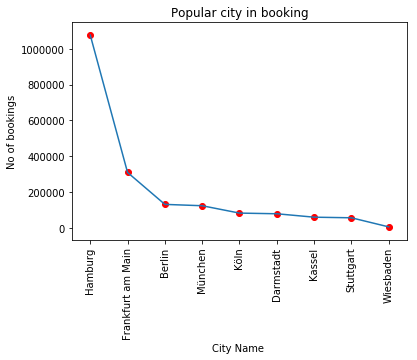

In [45]:
plt.plot(popular_city['Population16'],popular_city['No_Bookings'])
plt.scatter(popular_city['Population16'],popular_city['No_Bookings'],c='red')
plt.xticks(popular_city['Population16'],popular_city.index,rotation = 'vertical')
plt.xlabel("City Name ")
plt.ylabel("No of bookings")
plt.title("Popular city in booking")
plt.show()


In [46]:
unpopular_city = sort_df[9:]
unpopular_city

,No_Bookings,Population16
Kiel,353,"2,47,441"
Bonn,153,"3,22,125"
Bremen,141,"5,65,719"
Düsseldorf,123,"6,13,230"
Heidelberg,105,"1,59,914"
Mannheim,92,"3,04,781"
Karlsruhe,88,"3,09,999"
Mainz,76,"2,13,528"
Lübeck,49,"2,16,712"
Würzburg,42,"1,26,010"


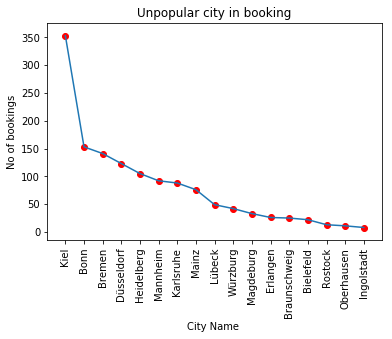

In [47]:
plt.plot(unpopular_city['Population16'],unpopular_city['No_Bookings'])
plt.scatter(unpopular_city['Population16'],unpopular_city['No_Bookings'],c='red')
plt.xticks(unpopular_city['Population16'],unpopular_city.index,rotation = 'vertical')
plt.xlabel("City Name ")
plt.ylabel("No of bookings")
plt.title("Unpopular city in booking")
plt.show()

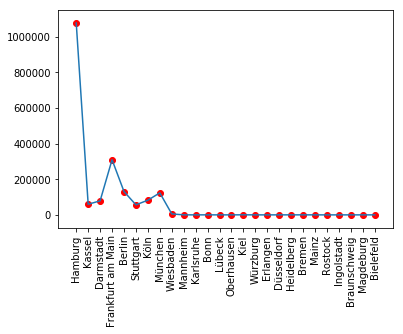

In [52]:
plt.plot(new_df['Population16'],new_df['No_Bookings'])
plt.scatter(new_df['Population16'],new_df['No_Bookings'],c='red')
plt.xticks(new_df['Population16'],new_df.index,rotation = 'vertical')
plt.show()

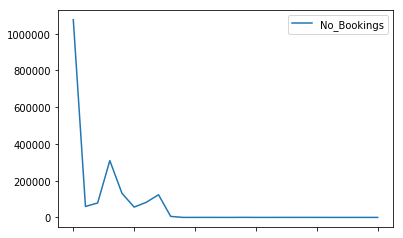

## Analysis on clusters

In [35]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
# converting all categorcal variable to dummy encoding

#cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
#cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,1


In [36]:
cluster_2016["labels"] = kproto.labels_

In [37]:
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,1,5
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,1,5
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,1,5
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,1,5
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,1,5


### For cluster - 0

In [38]:
cluster0 = cluster_2016[cluster_2016["labels"] == 0]
cluster0.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
123,115663,Hochschulstadion,Luisenplatz / Rheinstraße,Darmstadt,iPhone,665.650000,1,0
124,109428,Emil-Andresen-Straße / Lohkoppelweg,Löwenstraße/Eppendorfer Weg,Berlin,Android,693.133333,1,0
146,116433,Westbahnhof,S-Bahn Station Galluswarte / Mainzer Landstraße,Frankfurt am Main,iPhone,983.033333,1,0
249,111018,Wilhelminenplatz,Heidelberger Straße / Landskronstraße,Darmstadt,Android,844.066667,1,0
843,116712,Salzmannshausen / SMA,Staatstheater/Unterer Friedrichsplatz,Kassel,iPhone,866.100000,1,0


In [39]:
cluster0.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,6319.000000,6319.000000,6319.000000,6319.0
mean,125474.066783,1200.689848,3.726539,0.0
std,21073.246909,472.565171,1.387861,0.0
min,106014.000000,609.750000,1.000000,0.0
25%,109735.000000,797.216667,3.000000,0.0
50%,117255.000000,1150.600000,4.000000,0.0
75%,143393.000000,1428.933333,5.000000,0.0
max,167454.000000,2619.200000,6.000000,0.0


In [40]:
CITY = cluster0.CITY_RENTAL_ZONE.unique()
CITY

array(['Darmstadt', 'Berlin', 'Frankfurt am Main', 'Kassel', 'Hamburg',
       'Köln', 'Weimar', 'Wiesbaden', 'München', 'Stuttgart', 'Freiburg',
       'Marburg', 'Halle', 'Oldenburg (Oldb)', 'Saarbrücken', 'Göttingen',
       'Fulda', 'Heidelberg', 'Rüsselsheim', 'Bonn', 'Baden-Baden',
       'Würzburg', 'Hanau', 'Ingolstadt', 'Braunschweig', 'Karlsruhe',
       'Bamberg', 'Bremen', 'Aschaffenburg', 'Hannover', 'Düsseldorf',
       'Kaiserslautern', 'Lübeck', 'Bielefeld', 'Gütersloh', 'Mannheim',
       'Mainz', 'Kiel', 'Rostock', 'Erlangen', 'Magdeburg',
       'Flugh. Frankfurt'], dtype=object)

In [41]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster0[cluster0['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)    

{'Darmstadt': 166, 'Berlin': 1121, 'Frankfurt am Main': 1315, 'Kassel': 163, 'Hamburg': 2206, 'Köln': 346, 'Weimar': 6, 'Wiesbaden': 22, 'München': 306, 'Stuttgart': 193, 'Freiburg': 22, 'Marburg': 122, 'Halle': 66, 'Oldenburg (Oldb)': 3, 'Saarbrücken': 5, 'Göttingen': 17, 'Fulda': 5, 'Heidelberg': 12, 'Rüsselsheim': 60, 'Bonn': 33, 'Baden-Baden': 5, 'Würzburg': 8, 'Hanau': 3, 'Ingolstadt': 2, 'Braunschweig': 5, 'Karlsruhe': 10, 'Bamberg': 3, 'Bremen': 23, 'Aschaffenburg': 2, 'Hannover': 9, 'Düsseldorf': 13, 'Kaiserslautern': 3, 'Lübeck': 8, 'Bielefeld': 3, 'Gütersloh': 1, 'Mannheim': 5, 'Mainz': 4, 'Kiel': 8, 'Rostock': 1, 'Erlangen': 6, 'Magdeburg': 6, 'Flugh. Frankfurt': 2}


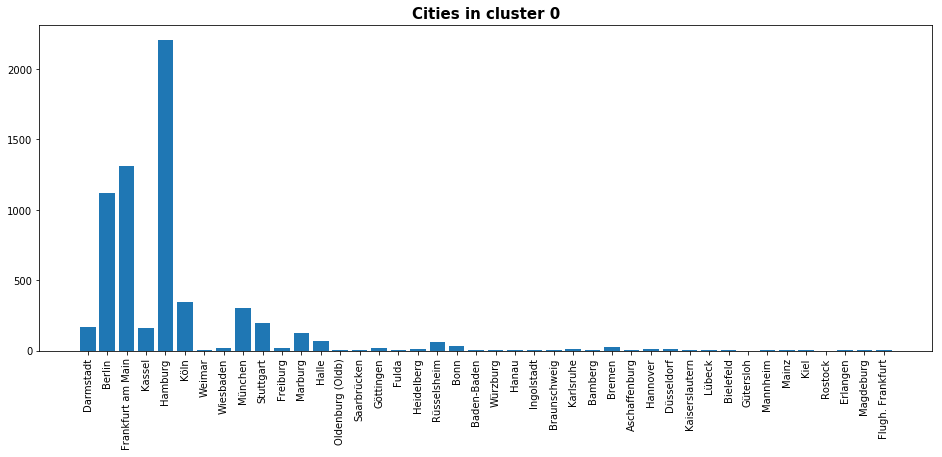

In [42]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()

In [43]:
MONTH = cluster0.Month.unique()
MONTH

array([1, 2, 3, 4, 5, 6])

In [44]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster0[cluster0['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)    

{1: 628, 2: 727, 3: 1075, 4: 1365, 5: 2363, 6: 161}


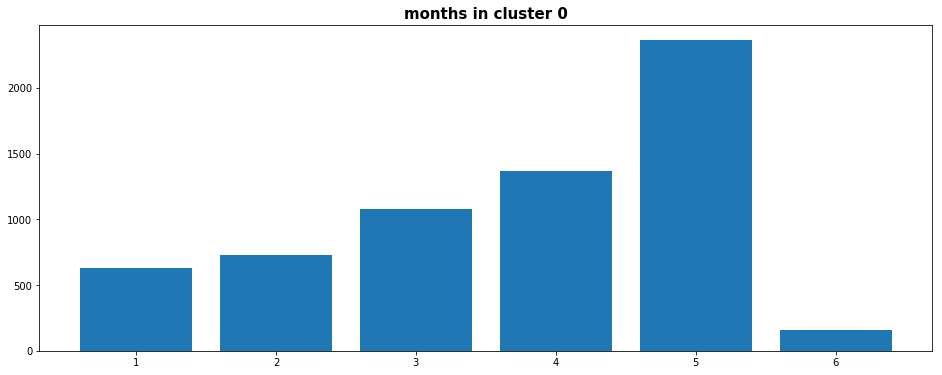

In [45]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()

In [46]:
CHANNEL = cluster0.TECHNICAL_INCOME_CHANNEL.unique()
CHANNEL

array(['iPhone', 'Android', 'others', 'IVR', 'Windows'], dtype=object)

In [47]:
channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster0[cluster0['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

{'iPhone': 2065, 'Android': 1507, 'others': 1488, 'IVR': 1210, 'Windows': 49}


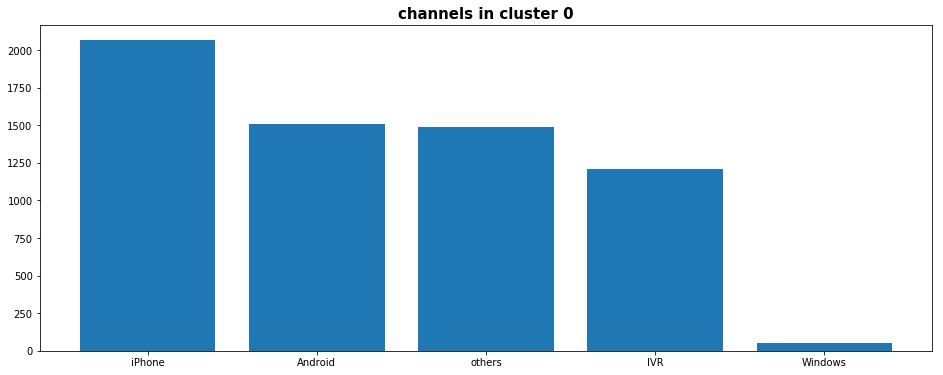

In [48]:
x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channels in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()

In [49]:
SZONE = cluster0.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster0[cluster0['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))

{'Hochschulstadion': 10, 'Emil-Andresen-Straße / Lohkoppelweg': 5, 'Westbahnhof': 19, 'Wilhelminenplatz': 4, 'Salzmannshausen / SMA': 4, 'Landungsbrücke/Hafentor': 42, 'Isestraße / Hoheluftbrücke': 24, 'Leinpfad/Fernsicht': 38, 'Weimar Hbf': 6, 'Steinstraße / Deichtorplatz': 25, 'Bahnhof-Haupt- Domseite': 20, 'Industriehof': 4, 'Paulinenplatz/Wohlwillstraße': 33, 'Königstraße / Struenseestraße': 11, 'Studentenwohnheim Ginnheimer Landstr. 42': 9, 'Berger Straße / Falltorstraße': 8, 'Kellinghusenstraße / Loogeplatz': 13, 'Hauptbahnhof Ost / Hachmannplatz': 57, 'Ginseldorfer Weg / Försterweg': 12, 'Dormero-Hotel / Europaallee': 7, 'Gänsemarkt / Büschstraße': 17, 'Saalburgallee / Kettelerallee': 2, 'Holsteinischer Kamp/ Wagnerstraße': 13, 'Caffamacherreihe/Valentinskamp.': 14, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 39, 'Großneumarkt/Thielbek': 14, 'Eduard-Rhein-Ufer / Schwanenwik': 45, 'Winterhuder Weg/ Zimmerstraße': 26, 'Bahnhof Haupt- Breslauer Platz': 2, 'Wiesendamm/Roggenkamp'

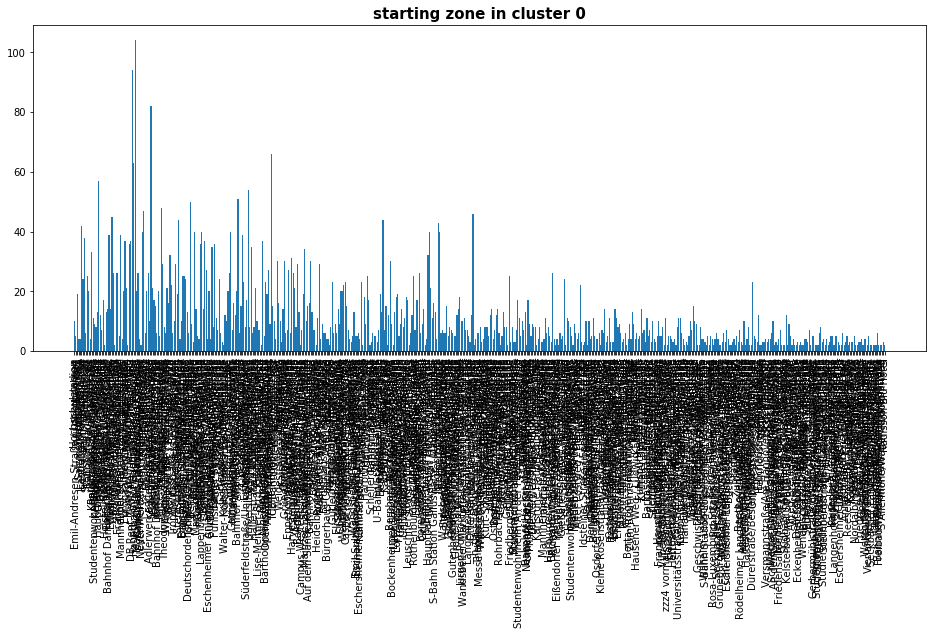

In [50]:
x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()

In [51]:
EZONE = cluster0.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster0[cluster0['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))

{'Luisenplatz / Rheinstraße': 18, 'Löwenstraße/Eppendorfer Weg': 16, 'S-Bahn Station Galluswarte / Mainzer Landstraße': 9, 'Heidelberger Straße / Landskronstraße': 16, 'Staatstheater/Unterer Friedrichsplatz': 19, 'Wilhelmsburger Platz/Zur Schleuse': 20, 'Eppendorfer Weg/Hoheluftchaussee': 40, 'Leinpfad/Fernsicht': 21, 'Weimar Hbf': 6, 'Mönckebergstraße / Rosenstraße': 23, 'Langenfelder Damm/Müggenkampstraße': 12, 'Adlerwerke Kleyerstrasse / Kriegkstrasse': 13, 'Hauptbahnhof': 31, 'Hauptbahnhof Ost / Hachmannplatz': 60, 'Konstablerwache': 31, 'Arnsburger Straße / Mainkurstraße': 31, 'Speyerer Straße / Koblenzer Straße': 4, 'Uhlandstraße / Eingang Nord': 21, 'Sievekingsallee/Sievekingdamm': 9, 'Jungfernstieg / Ballindamm': 46, 'Feldstraße / Marktstraße': 29, 'Holsteinischer Kamp/ Wagnerstraße': 19, 'Millerntorplatz/St.Pauli': 34, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 39, 'Eduard-Rhein-Ufer / Schwanenwik': 48, 'Hallerstraße / Rohtenbaumchaussee': 17, 'Mundsburg / Schürbeker Straß

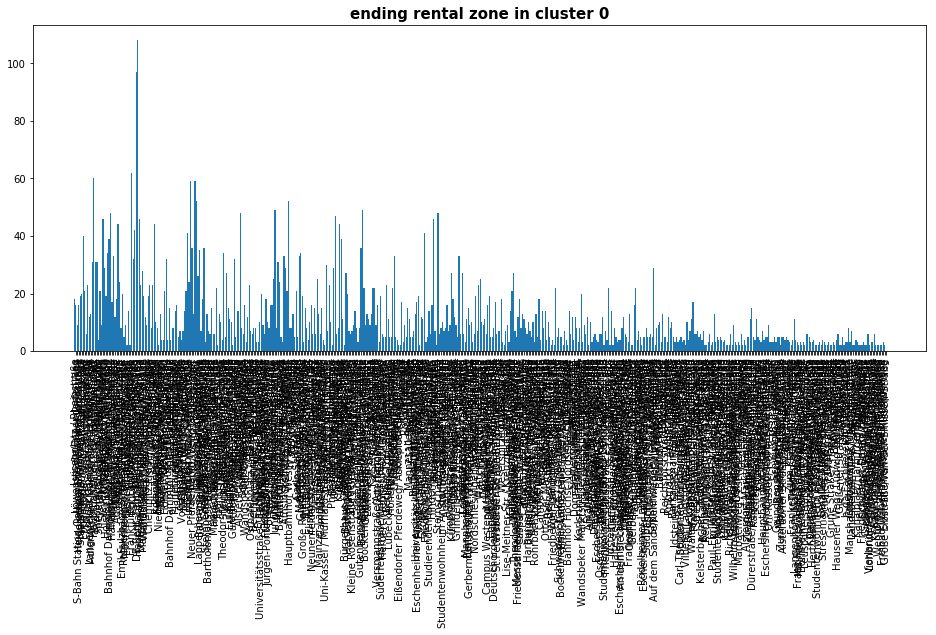

In [52]:
x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster - 1

In [53]:
cluster1 = cluster_2016[cluster_2016["labels"] == 1]
cluster1.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
2914,119692,Lerchenfeld / Uferstraße,Lerchenfeld / Uferstraße,Hamburg,iPhone,17351.850000,1,1
8576,119269,Uferstraße/Wagnerstraße,Holsteinischer Kamp/ Wagnerstraße,Berlin,iPhone,10750.066667,1,1
13172,120825,FSC Berlin Werkstatt LIDL-Bike,FSC Berlin Werkstatt LIDL-Bike,Berlin,others,11020.733333,1,1
18675,110452,Winterhuder Weg/ Zimmerstraße,Hallerstraße / Rohtenbaumchaussee,Hamburg,iPhone,10335.850000,1,1
51472,109269,Holsteinischer Kamp/ Wagnerstraße,Lortzingstraße/Friedrichsberger Straße,Berlin,iPhone,10974.366667,1,1


In [54]:
cluster1.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,186.000000,186.000000,186.000000,186.0
mean,124858.483871,14022.577688,3.892473,1.0
std,19871.354170,4478.210720,1.323079,0.0
min,107103.000000,9044.366667,1.000000,1.0
25%,110002.000000,10399.600000,3.000000,1.0
50%,119156.500000,12544.241667,4.000000,1.0
75%,120815.500000,16597.516667,5.000000,1.0
max,167443.000000,27206.333333,6.000000,1.0


In [55]:
CITY = cluster1.CITY_RENTAL_ZONE.unique()
CITY

array(['Hamburg', 'Berlin', 'Darmstadt', 'Frankfurt am Main', 'Halle',
       'Bonn', 'Rüsselsheim', 'Lübeck', 'Göttingen', 'Marburg', 'Kassel',
       'München', 'Erlangen', 'Bremen', 'Braunschweig', 'Düsseldorf',
       'Köln'], dtype=object)

In [56]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster1[cluster1['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


{'Hamburg': 64, 'Berlin': 52, 'Darmstadt': 5, 'Frankfurt am Main': 33, 'Halle': 4, 'Bonn': 2, 'Rüsselsheim': 8, 'Lübeck': 2, 'Göttingen': 3, 'Marburg': 1, 'Kassel': 2, 'München': 5, 'Erlangen': 1, 'Bremen': 1, 'Braunschweig': 1, 'Düsseldorf': 1, 'Köln': 1}


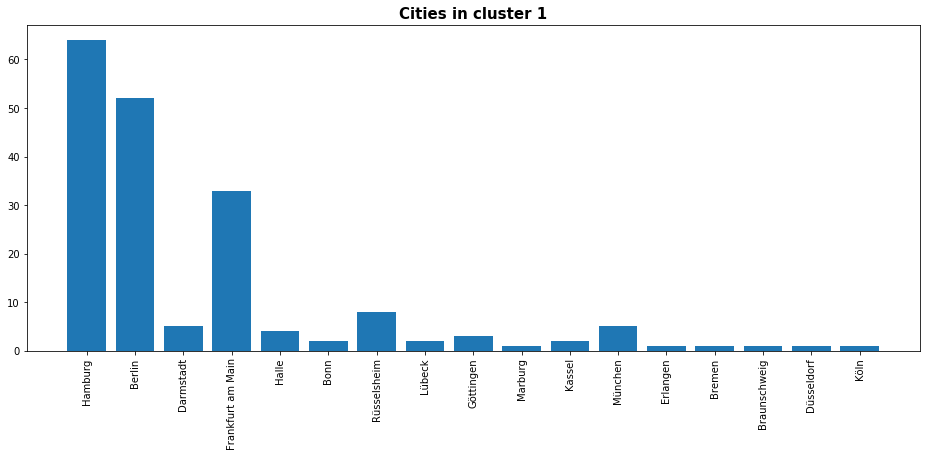

In [57]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


In [58]:
MONTH = cluster1.Month.unique()
MONTH

array([1, 2, 3, 4, 5, 6])

In [59]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster1[cluster1['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


{1: 12, 2: 22, 3: 28, 4: 43, 5: 74, 6: 7}


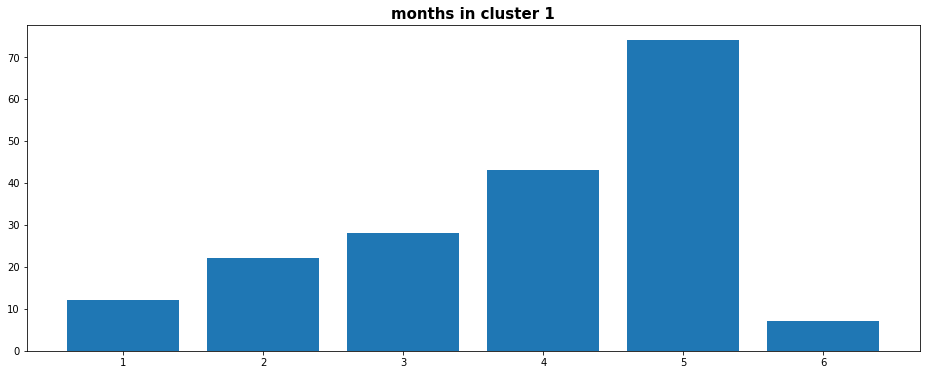

In [60]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


In [61]:
CHANNEL = cluster1.TECHNICAL_INCOME_CHANNEL.unique()
CHANNEL


array(['iPhone', 'others', 'Android', 'IVR'], dtype=object)

In [62]:
channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster1[cluster1['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    


{'iPhone': 67, 'others': 46, 'Android': 57, 'IVR': 16}


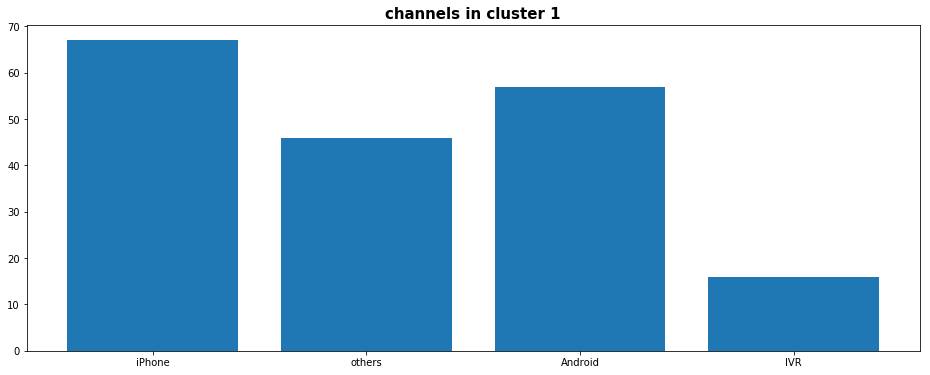

In [63]:
x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channels in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()

In [64]:
SZONE = cluster1.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster1[cluster1['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))


{'Lerchenfeld / Uferstraße': 2, 'Uferstraße/Wagnerstraße': 2, 'FSC Berlin Werkstatt LIDL-Bike': 4, 'Winterhuder Weg/ Zimmerstraße': 1, 'Holsteinischer Kamp/ Wagnerstraße': 1, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 2, 'Jacobikirche / Steinstraße': 2, 'Maretstraße/Baererstraße': 1, 'U-Bahn Baumwall': 2, 'Steindamm / Stralsunder Straße': 5, 'Schulterblatt/Eifflerstraße': 3, 'Berliner Tor / Berlinertordamm': 1, 'Wartenau / Lübecker Straße': 3, 'Heußweg/Wiesenstraße': 3, 'Glauburgstraße / Weberstraße': 1, 'Thadenstraße/Holstenstraße': 1, 'Sternschanze / Eingang Dänenweg': 2, 'Halle Hbf ': 2, 'Koppelstraße/Lokstedter Grenzstraße': 1, 'Steinstraße / Deichtorplatz': 3, 'Domstraße/Willy-Brandt-Straße': 1, 'Eppendorfer Weg/Hoheluftchaussee': 1, 'Harburger Rathausstraße/Deichhausweg': 1, 'Bonn Hbf': 2, '7410 Erwin-Schoettle-Platz': 1, 'Lokalbahnhof': 1, 'Darmstadtium': 1, 'Harburger Ring/Neue Straße': 1, 'BSC Grafittihalle': 3, 'Lübeck Hbf': 2, 'Campus am Brückweg Rüsselsheim': 1, 'Göttin

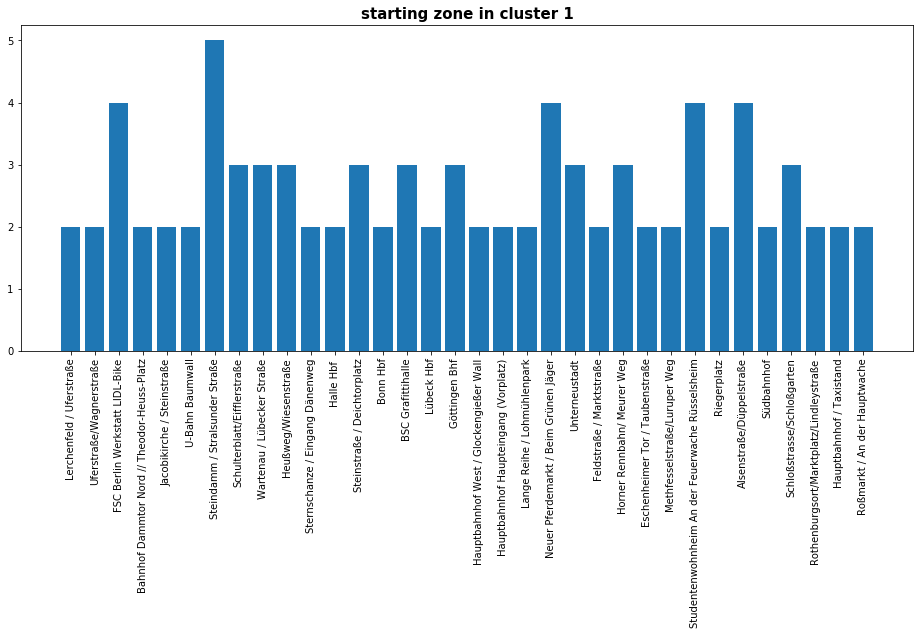

In [65]:
x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


In [66]:
EZONE = cluster1.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster1[cluster1['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))


{'Lerchenfeld / Uferstraße': 1, 'Holsteinischer Kamp/ Wagnerstraße': 1, 'FSC Berlin Werkstatt LIDL-Bike': 4, 'Hallerstraße / Rohtenbaumchaussee': 2, 'Lortzingstraße/Friedrichsberger Straße': 1, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 1, 'Hofweg/Am Langenzug': 1, 'Herbert-Wehner-Platz/Großer Schippsee': 1, 'Alter Wall/Adolphsbrücke': 1, 'Am Kaiserkai/Großer Grasbrook': 2, 'Steinstraße / Deichtorplatz': 1, 'Berliner Tor / Berlinertordamm': 2, 'Uhlandstraße / Eingang Nord': 1, 'Gänsemarkt / Büschstraße': 2, 'Glauburgstraße / Weberstraße': 2, 'Domstraße/Willy-Brandt-Straße': 2, 'Bahnhof Altona Ost/Max-Brauer-Allee': 1, 'Halle Hbf ': 3, 'Goebenstraße/Eppendorfer Weg': 2, 'Versmannstraße/Am Hannoverschen Bahnhof': 1, 'Zentralbibliothek / Münzstraße': 3, 'Heußweg/Wiesenstraße': 2, 'Harburger Rathausstraße/Deichhausweg': 1, 'Bonn Hbf': 2, '7130 Tübinger Straße': 1, 'Grindelberg / Bezirksamt Eimsbüttel': 2, 'Harvestehuder Weg / Alte Rabenstraße': 2, 'Troplowitzstraße / Beiersdorf  / NXP'

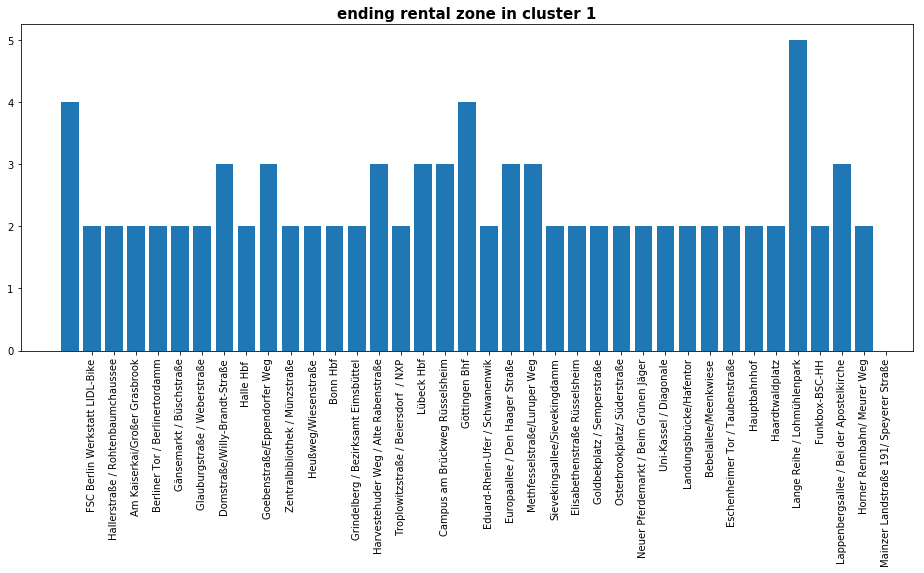

In [67]:
x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-2

In [68]:
cluster2 = cluster_2016[cluster_2016["labels"] == 2]
cluster2.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
83115,116999,Halle Rudolf-Breitscheid-Straße,Halle Universitätsring,Halle,IVR,80985.800000,1,2
116390,164574,BSC Grafittihalle,BSC Grafittihalle,Frankfurt am Main,Android,103358.566667,1,2
122699,164333,BSC Repeater,Kanalplatz/Harburger Schlossstraße,Frankfurt am Main,Android,149659.966667,1,2
406841,110994,Marbachweg / Eschersheimer Landstraße,Gravensteiner Platz,Köln,iPhone,88788.100000,2,2
448812,116062,Funkbox-BSC-HH,Funkbox-BSC-HH,Hamburg,iPhone,90870.250000,2,2


In [69]:
cluster2.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,8.00000,8.000000,8.000000,8.0
mean,133456.75000,93151.510417,2.000000,2.0
std,25755.19776,25777.413640,1.069045,0.0
min,110994.00000,67704.133333,1.000000,2.0
25%,114795.00000,78251.720833,1.000000,2.0
50%,118253.50000,89829.175000,2.000000,2.0
75%,164225.75000,96186.479167,2.250000,2.0
max,164574.00000,149659.966667,4.000000,2.0


In [70]:
CITY = cluster2.CITY_RENTAL_ZONE.unique()
CITY

array(['Halle', 'Frankfurt am Main', 'Köln', 'Hamburg', 'Erlangen'],
      dtype=object)

In [71]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster2[cluster2['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


{'Halle': 1, 'Frankfurt am Main': 3, 'Köln': 2, 'Hamburg': 1, 'Erlangen': 1}


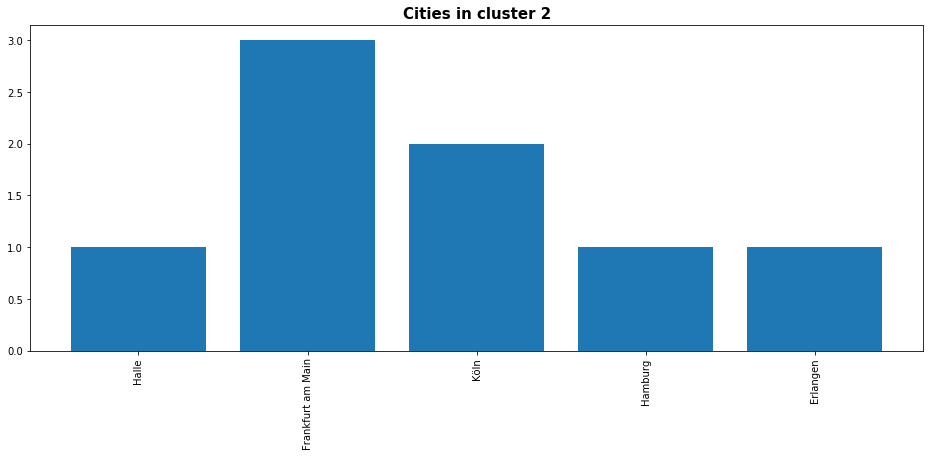

In [72]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


In [73]:
MONTH = cluster2.Month.unique()
MONTH


array([1, 2, 3, 4])

In [74]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster2[cluster2['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


{1: 3, 2: 3, 3: 1, 4: 1}


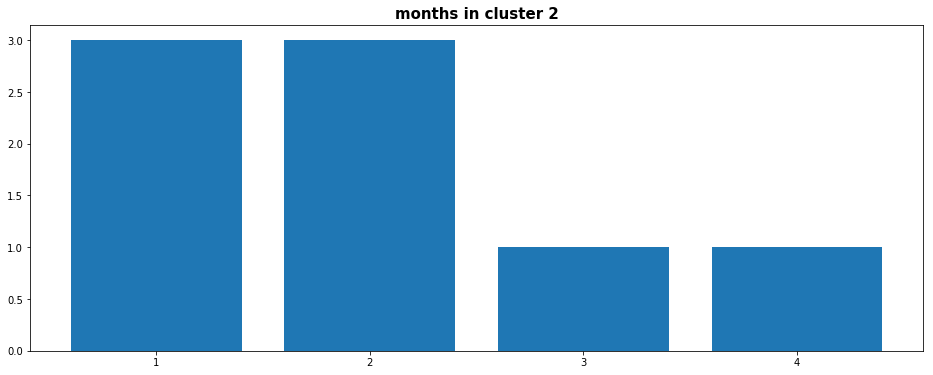

In [75]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


In [76]:
CHANNEL = cluster2.TECHNICAL_INCOME_CHANNEL.unique()
CHANNEL

array(['IVR', 'Android', 'iPhone'], dtype=object)

In [77]:
channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster2[cluster2['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    


{'IVR': 3, 'Android': 2, 'iPhone': 3}


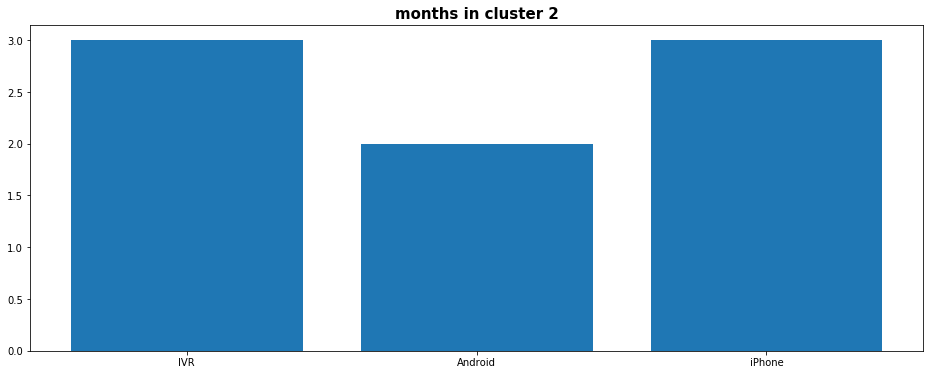

In [78]:
x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('months in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


In [79]:
SZONE = cluster2.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster2[cluster2['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))


{'Halle Rudolf-Breitscheid-Straße': 1, 'BSC Grafittihalle': 1, 'BSC Repeater': 1, 'Marbachweg / Eschersheimer Landstraße': 1, 'Funkbox-BSC-HH': 1, 'Lange Reihe / Lohmühlenpark': 1, 'Erlangen Hbf': 1, 'Museum Ludwig': 1}
8
8
0


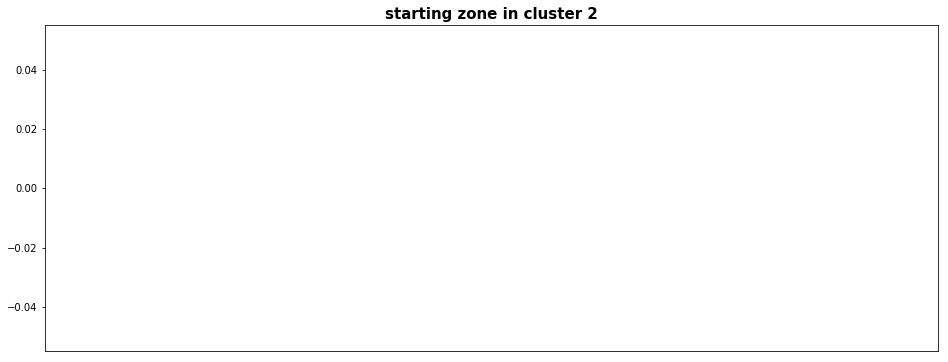

In [80]:
x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


In [81]:
EZONE = cluster2.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster2[cluster2['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))


{'Halle Universitätsring': 1, 'BSC Grafittihalle': 1, 'Kanalplatz/Harburger Schlossstraße': 1, 'Gravensteiner Platz': 1, 'Funkbox-BSC-HH': 1, 'Mönckebergstraße / Steintorwall': 1, 'Erlangen Hbf': 1, 'Fressgass': 1}
8
0


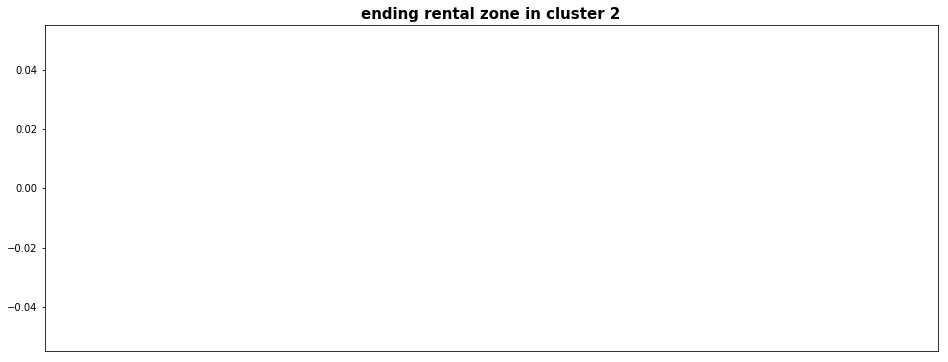

In [82]:
x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-3

In [83]:
cluster3 = cluster_2016[cluster_2016["labels"] == 3]
cluster3.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
451,106992,Wilhelmsstr. / Ständepl.,Uni-Kassel / Diagonale,Kassel,IVR,3368.766667,1,3
585,108755,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Holsteinischer Kamp/ Wagnerstraße,Hamburg,others,4942.766667,1,3
1092,110370,Universität / Moorweidenstraße,Bebelallee/Meenkwiese,Köln,IVR,2666.966667,1,3
1645,117542,Lange Reihe / Lohmühlenpark,Jungfernstieg / Neuer Jungfernstieg,Hamburg,others,7412.566667,1,3
2425,109922,Auf dem Sande/Kehrwieder-MiniaturWunderland,Auf dem Sande/Kehrwieder-MiniaturWunderland,Berlin,iPhone,4478.750000,1,3


In [84]:
cluster3.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,1522.000000,1522.000000,1522.000000,1522.0
mean,124937.285808,4042.515681,3.694481,3.0
std,20516.416645,1511.085250,1.436111,0.0
min,106002.000000,2622.516667,1.000000,3.0
25%,109948.500000,2811.745833,3.000000,3.0
50%,117099.500000,3624.425000,4.000000,3.0
75%,120802.250000,4637.933333,5.000000,3.0
max,167446.000000,8979.150000,6.000000,3.0


In [85]:
CITY = cluster3.CITY_RENTAL_ZONE.unique()
CITY

array(['Kassel', 'Hamburg', 'Köln', 'Berlin', 'Darmstadt',
       'Frankfurt am Main', 'Halle', 'Rüsselsheim', 'Marburg',
       'Göttingen', 'Fulda', 'Warnemünde', 'Stuttgart', 'Saarbrücken',
       'Mainz', 'München', 'Karlsruhe', 'Rostock', 'Baden-Baden',
       'Wiesbaden', 'Troisdorf', 'Heidelberg', 'Düsseldorf', 'Bamberg',
       'Bremen', 'Mannheim', 'Hannover', 'Würzburg', 'Magdeburg',
       'Erlangen', 'Bonn', 'Hanau', 'Freiburg'], dtype=object)

In [86]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster3[cluster3['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  

{'Kassel': 39, 'Hamburg': 391, 'Köln': 71, 'Berlin': 258, 'Darmstadt': 82, 'Frankfurt am Main': 306, 'Halle': 69, 'Rüsselsheim': 60, 'Marburg': 55, 'Göttingen': 7, 'Fulda': 2, 'Warnemünde': 2, 'Stuttgart': 45, 'Saarbrücken': 4, 'Mainz': 2, 'München': 78, 'Karlsruhe': 2, 'Rostock': 1, 'Baden-Baden': 2, 'Wiesbaden': 8, 'Troisdorf': 2, 'Heidelberg': 9, 'Düsseldorf': 2, 'Bamberg': 1, 'Bremen': 6, 'Mannheim': 2, 'Hannover': 5, 'Würzburg': 2, 'Magdeburg': 2, 'Erlangen': 2, 'Bonn': 1, 'Hanau': 1, 'Freiburg': 3}


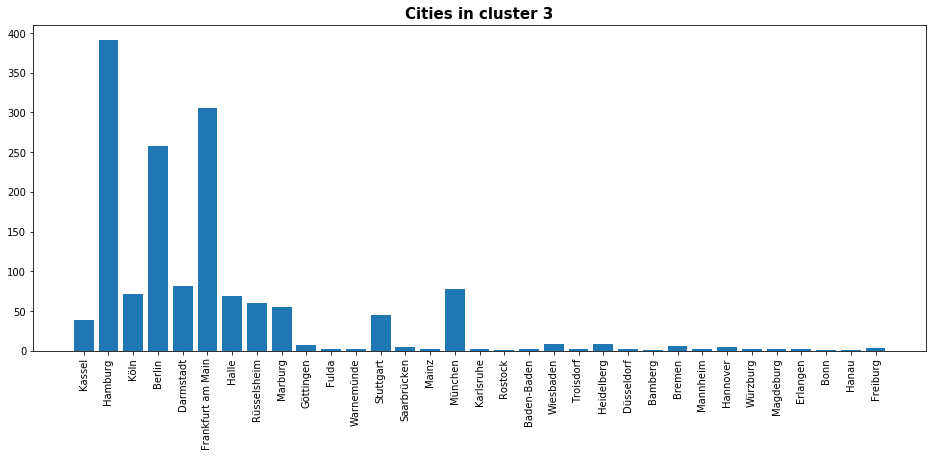

In [87]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


In [88]:
MONTH = cluster3.Month.unique()
MONTH

array([1, 2, 3, 4, 5, 6])

In [89]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster3[cluster3['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


{1: 184, 2: 167, 3: 226, 4: 339, 5: 565, 6: 41}


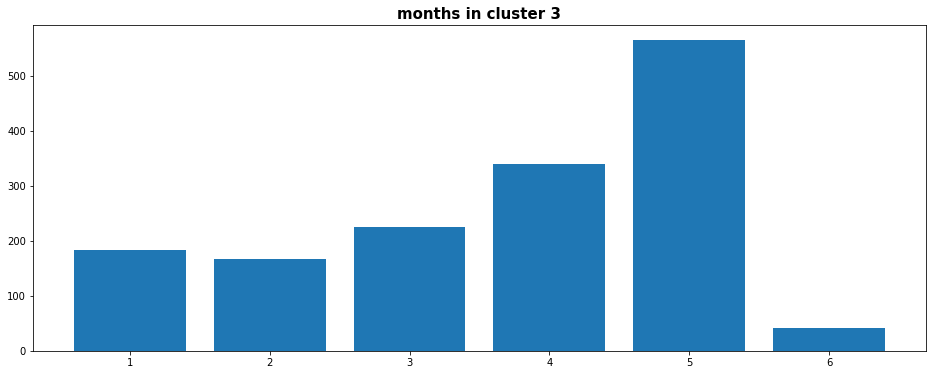

In [90]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()

['IVR' 'others' 'iPhone' 'Android' 'Windows']
{'IVR': 267, 'others': 276, 'iPhone': 503, 'Android': 459, 'Windows': 17}


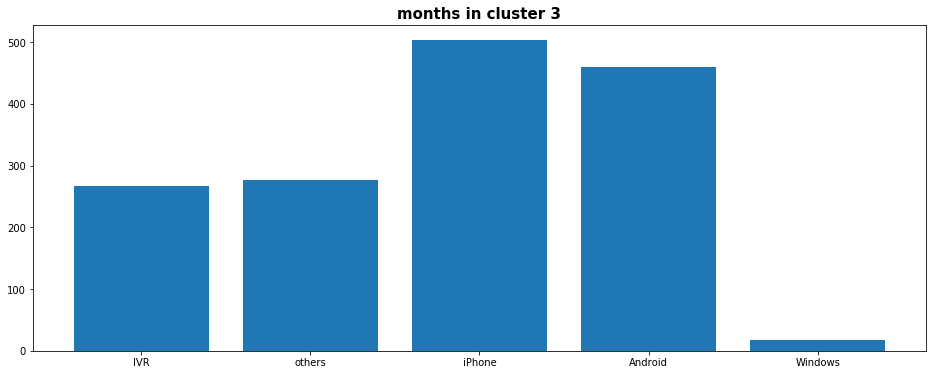

In [91]:
CHANNEL = cluster3.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster3[cluster3['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('months in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Wilhelmsstr. / Ständepl.': 1, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 7, 'Universität / Moorweidenstraße': 4, 'Lange Reihe / Lohmühlenpark': 10, 'Auf dem Sande/Kehrwieder-MiniaturWunderland': 5, 'Bartholomäusstraße/Beim Alten Schützenhof': 5, 'Heußweg/Wiesenstraße': 4, 'Mittelweg/Sophienterrasse-NDR': 1, 'Großneumarkt/Thielbek': 4, 'Darmstadt Hbf': 17, 'Carl-Theodor-Reiffenstein-Platz / Hasengasse': 2, 'Lübecker Straße / Marienkrankenhaus': 1, 'Michaeliskirche / Krayenkamp': 2, 'Burgstraße/Hammer Landstraße': 8, 'Halle Rudolf-Breitscheid-Straße': 25, 'Wartenau / Lübecker Straße': 6, 'Alter Wall/Adolphsbrücke': 3, 'Bogenstraße / Grindelallee': 4, 'Hochschulstraße': 11, 'Halle Hbf ': 28, 'Löwenstraße/Eppendorfer Weg': 4, 'Hörsaalgebäude / Biegenstraße': 3, 'Hofweg/Am Langenzug': 9, 'Caffamacherreihe/Valentinskamp.': 4, 'Wandsbeker Chaussee/ Börnestraße': 1, 'Theodor-Heuss-Allee / Varrentrappstraße': 1, 'Sternschanze / Eingang Dänenweg': 13, 'Hauptbahnhof': 11, 'Universitätsklini

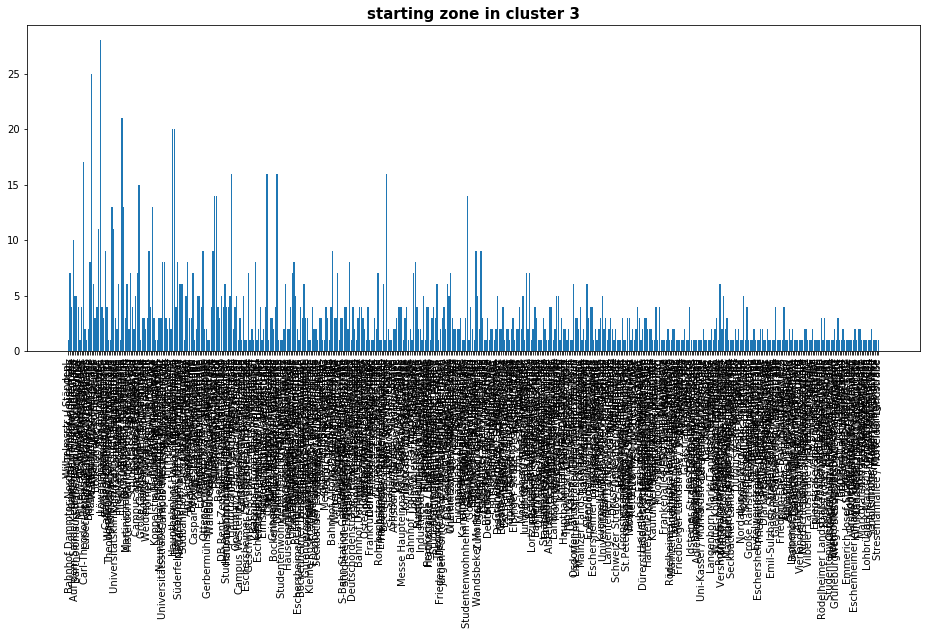

In [92]:
SZONE = cluster3.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster3[cluster3['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

'''
for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))
'''

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Uni-Kassel / Diagonale': 6, 'Holsteinischer Kamp/ Wagnerstraße': 7, 'Bebelallee/Meenkwiese': 8, 'Jungfernstieg / Neuer Jungfernstieg': 11, 'Auf dem Sande/Kehrwieder-MiniaturWunderland': 6, 'Dehnhaide/Barmbeker Markt': 2, 'Bei der Hammer Kirche/Hammerpark': 9, 'Osakaallee/Übersee Quartier': 10, 'Riegerplatz': 4, 'Kantstraße / Berger Straße': 3, 'Habichtstraße/Steilshooper Straße': 1, 'Stadthausbrücke / Neuer Wall': 4, 'Hasselbrookstraße/Papenstraße': 7, 'Halle Universitätsring': 19, 'Hauptbahnhof West / Glockengießer Wall': 14, 'Steindamm / Stralsunder Straße': 7, 'Schulterblatt/Eifflerstraße': 11, 'Halle Hbf ': 29, 'Elisabethenstraße Rüsselsheim': 14, 'Harvestehuder Weg / Alte Rabenstraße': 10, 'Hauptbahnhof': 15, 'Hammerbrook / Sachsenfeld': 3, 'Landungsbrücke/Hafentor': 15, 'DB_MobilityCenter': 1, 'Europaallee / Den Haager Straße': 6, 'Sternschanze / Eingang Dänenweg': 11, 'Bettinaplatz / Bettinastraße': 3, '7308 Johannesstraße': 1, 'Osterstraße/Bismarckstraße': 9, 'Universität / M

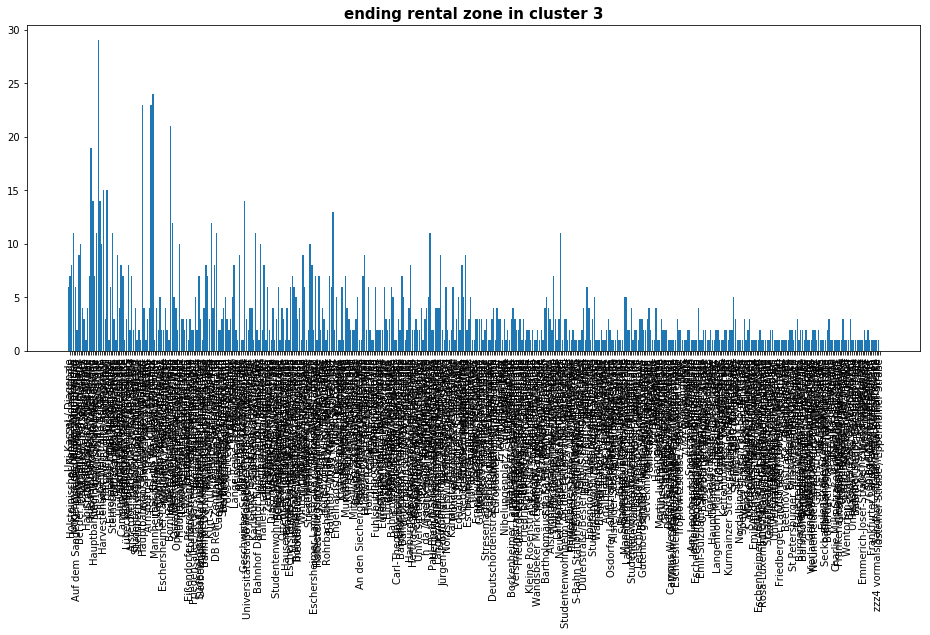

In [93]:
EZONE = cluster3.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster3[cluster3['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

'''
for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))
'''


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-4

In [94]:
cluster4 = cluster_2016[cluster_2016["labels"] == 4]
cluster4.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
490159,167442,Zentralbibliothek / Münzstraße,Amsinckstraße/ Nordkanalbrücke,Frankfurt am Main,Android,645180.0,2,4
490160,167443,Zentralbibliothek / Münzstraße,Amsinckstraße/ Nordkanalbrücke,Frankfurt am Main,Android,645180.0,2,4
771683,143417,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Sternschanze / Eingang Dänenweg,Frankfurt am Main,iPhone,594720.0,3,4


In [95]:
cluster4.describe()


,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,3.000000,3.000000,3.000000,3.0
mean,159434.000000,628360.000000,2.333333,4.0
std,13871.128901,29133.094583,0.577350,0.0
min,143417.000000,594720.000000,2.000000,4.0
25%,155429.500000,619950.000000,2.000000,4.0
50%,167442.000000,645180.000000,2.000000,4.0
75%,167442.500000,645180.000000,2.500000,4.0
max,167443.000000,645180.000000,3.000000,4.0


['Frankfurt am Main']
{'Frankfurt am Main': 3}


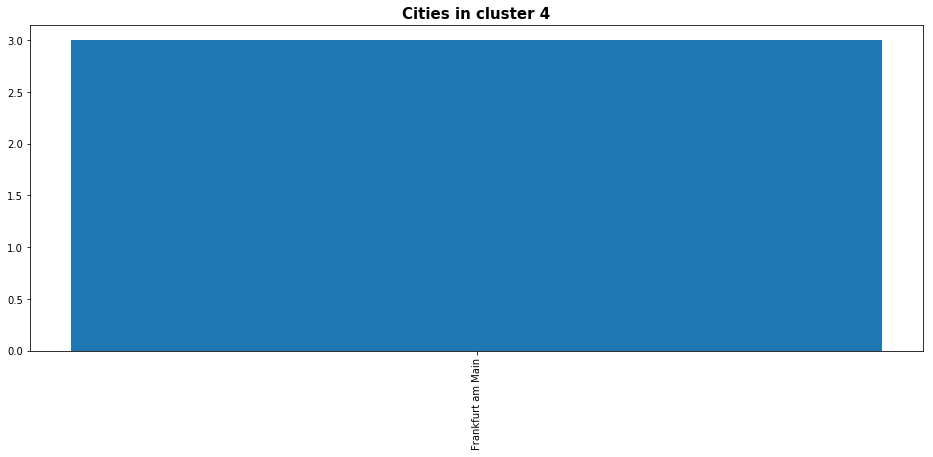

In [96]:
CITY = cluster4.CITY_RENTAL_ZONE.unique()
print(CITY)

city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster4[cluster4['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


[2 3]
{2: 2, 3: 1}


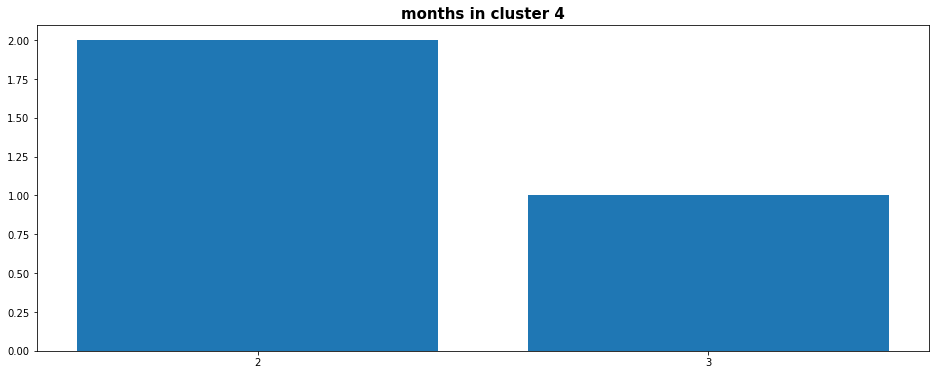

In [97]:

MONTH = cluster4.Month.unique()
print(MONTH)

month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster4[cluster4['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


['Android' 'iPhone']
{'Android': 2, 'iPhone': 1}


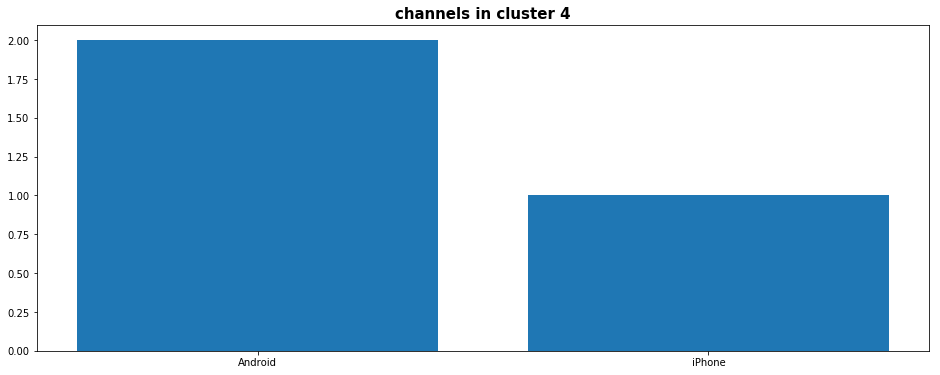

In [98]:
CHANNEL = cluster4.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster4[cluster4['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channels in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Zentralbibliothek / Münzstraße': 2, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 1}
2
2


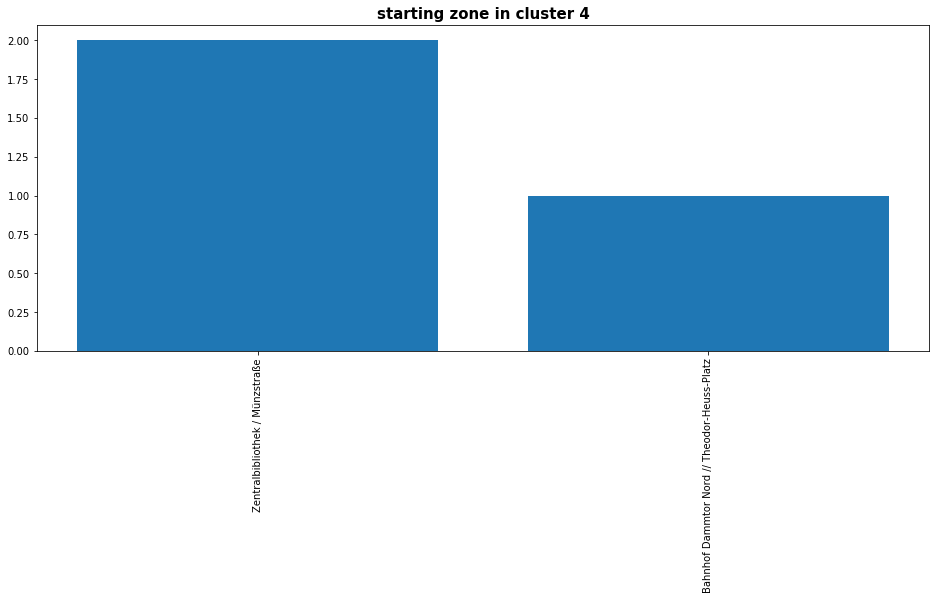

In [99]:
SZONE = cluster4.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster4[cluster4['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

'''
for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))
'''

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Amsinckstraße/ Nordkanalbrücke': 2, 'Sternschanze / Eingang Dänenweg': 1}
2


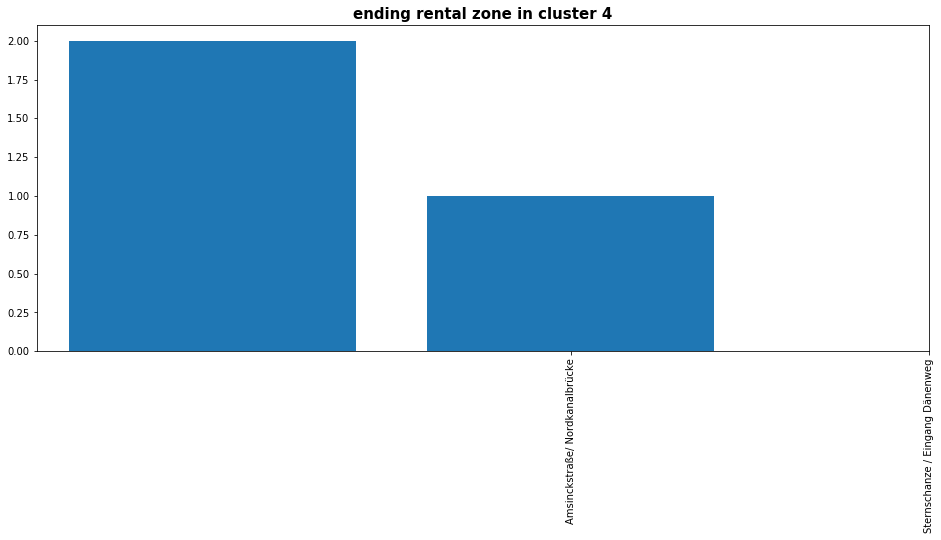

In [100]:
EZONE = cluster4.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster4[cluster4['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

'''
for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))
'''


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-5

In [101]:
cluster5 = cluster_2016[cluster_2016["labels"] == 5]
cluster5.head()


,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,1,5
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,1,5
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,1,5
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,1,5
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,1,5


In [102]:
cluster5.describe()


,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,1.991924e+06,1.991924e+06,1.991924e+06,1991924.0
mean,1.239228e+05,1.876741e+01,3.613524e+00,5.0
std,1.906268e+04,3.513873e+01,1.412368e+00,0.0
min,1.060020e+05,1.666667e-02,1.000000e+00,5.0
25%,1.101080e+05,6.866667e+00,3.000000e+00,5.0
50%,1.174900e+05,1.150000e+01,4.000000e+00,5.0
75%,1.206020e+05,1.921667e+01,5.000000e+00,5.0
max,1.674760e+05,6.096167e+02,6.000000e+00,5.0


In [103]:
CITY = cluster5.CITY_RENTAL_ZONE.unique()
print(CITY)


['Hamburg' 'Kassel' 'Darmstadt' 'Frankfurt am Main' 'Marburg' 'Berlin'
 'Stuttgart' 'Köln' 'München' 'Wiesbaden' 'Rüsselsheim' 'Mannheim'
 'Karlsruhe' 'Bonn' 'Halle' 'Lübeck' 'Baden-Baden' 'Bamberg' 'Göttingen'
 'Flugh. Frankfurt' 'Oberhausen' 'Kiel' 'Freiburg' 'Würzburg' 'Erlangen'
 'Düsseldorf' 'Troisdorf' 'Weimar' 'Heidelberg' 'Gütersloh' 'Fulda'
 'Bremen' 'Mainz' 'Saarbrücken' 'Hannover' 'Aschaffenburg' 'Hanau'
 'Braunschweig' 'Magdeburg' 'Kaiserslautern' 'Warnemünde'
 'Oldenburg (Oldb)' 'Bielefeld' 'Ingolstadt' 'Rostock']


{'Hamburg': 1073386, 'Kassel': 59432, 'Darmstadt': 78475, 'Frankfurt am Main': 307646, 'Marburg': 61172, 'Berlin': 129611, 'Stuttgart': 56025, 'Köln': 82025, 'München': 123144, 'Wiesbaden': 5512, 'Rüsselsheim': 12137, 'Mannheim': 85, 'Karlsruhe': 76, 'Bonn': 117, 'Halle': 154, 'Lübeck': 39, 'Baden-Baden': 291, 'Bamberg': 34, 'Göttingen': 106, 'Flugh. Frankfurt': 1101, 'Oberhausen': 11, 'Kiel': 345, 'Freiburg': 63, 'Würzburg': 31, 'Erlangen': 16, 'Düsseldorf': 107, 'Troisdorf': 151, 'Weimar': 20, 'Heidelberg': 84, 'Gütersloh': 5, 'Fulda': 23, 'Bremen': 109, 'Mainz': 70, 'Saarbrücken': 30, 'Hannover': 105, 'Aschaffenburg': 35, 'Hanau': 21, 'Braunschweig': 18, 'Magdeburg': 25, 'Kaiserslautern': 19, 'Warnemünde': 20, 'Oldenburg (Oldb)': 12, 'Bielefeld': 19, 'Ingolstadt': 6, 'Rostock': 11}


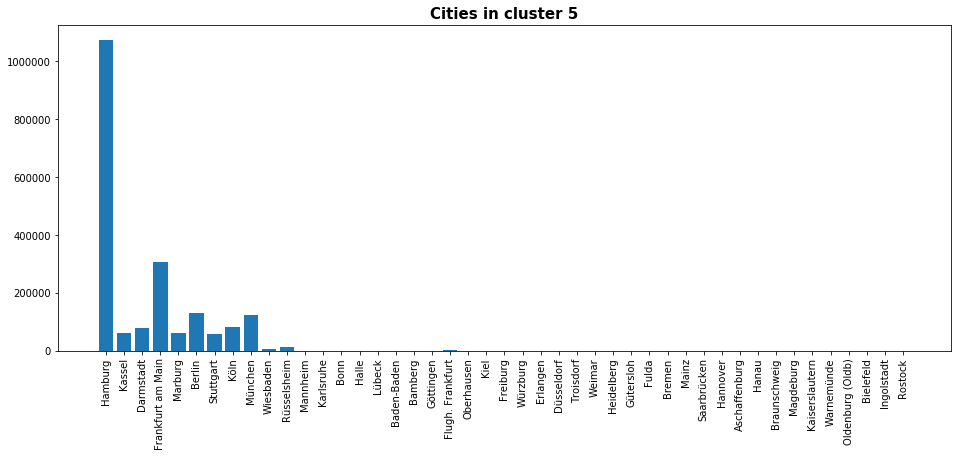

In [104]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster5[cluster5['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


[1 2 3 4 5 6]
{1: 228875, 2: 261980, 3: 309302, 4: 493623, 5: 646232, 6: 51912}


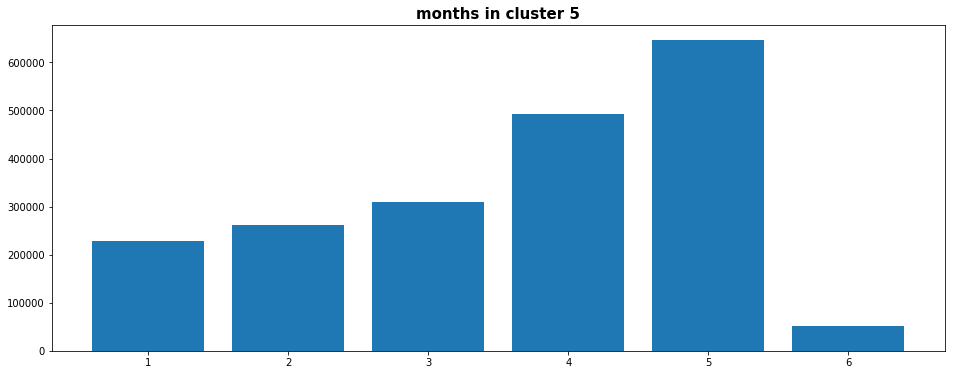

In [105]:
MONTH = cluster5.Month.unique()
print(MONTH)

month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster5[cluster5['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


['Android' 'iPhone' 'others' 'IVR' 'Windows' 'BlackBerry']
{'Android': 528789, 'iPhone': 689490, 'others': 465487, 'IVR': 283401, 'Windows': 24541, 'BlackBerry': 216}


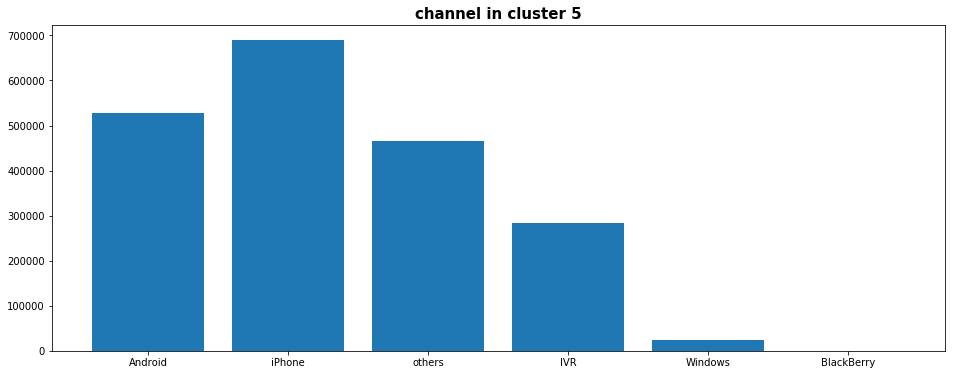

In [106]:
CHANNEL = cluster5.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster5[cluster5['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channel in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Überseering/Mexikoring': 3290, 'Stadthausbrücke / Neuer Wall': 3656, 'Jungfernstieg / Ballindamm': 17428, 'Hudtwalckerstraße / Bebelallee': 9916, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 13659, 'Hauptbahnhof / Rainer-Dierichs-Platz': 3453, 'Darmstadt Hbf': 13300, 'Darmstadtium': 3717, 'Alter Wall/Adolphsbrücke': 4544, 'Allende-Platz/Grindelhof': 23899, 'Harvestehuder Weg / Alte Rabenstraße': 12053, 'Frankenallee / Schwalbacherstraße': 2082, 'Kellinghusenstraße / Loogeplatz': 7902, 'Eduard-Rhein-Ufer / Schwanenwik': 16805, 'Elisabeth-Blochmann-Platz / Mensa': 7457, 'Bahnhof Dammtor Süd / Marseiller Straße': 9536, 'U-Bahn Baumwall': 11270, 'Mannesallee/Veringstraße': 3769, 'Saarlandstraße/Wiesendamm': 8679, 'Gutenbergstraße / Fachbereich Psychologie': 2537, 'Konstablerwache': 7192, 'Hammerbrook / Sachsenfeld': 12965, 'Friedrichsplatz': 1488, 'Waldecker Str. / Jungfernkopf': 352, 'Bernhard-Nocht-Straße/Zirkusweg': 11322, 'Langenfelder Damm/Müggenkampstraße': 4921, 'Innocentiapark/

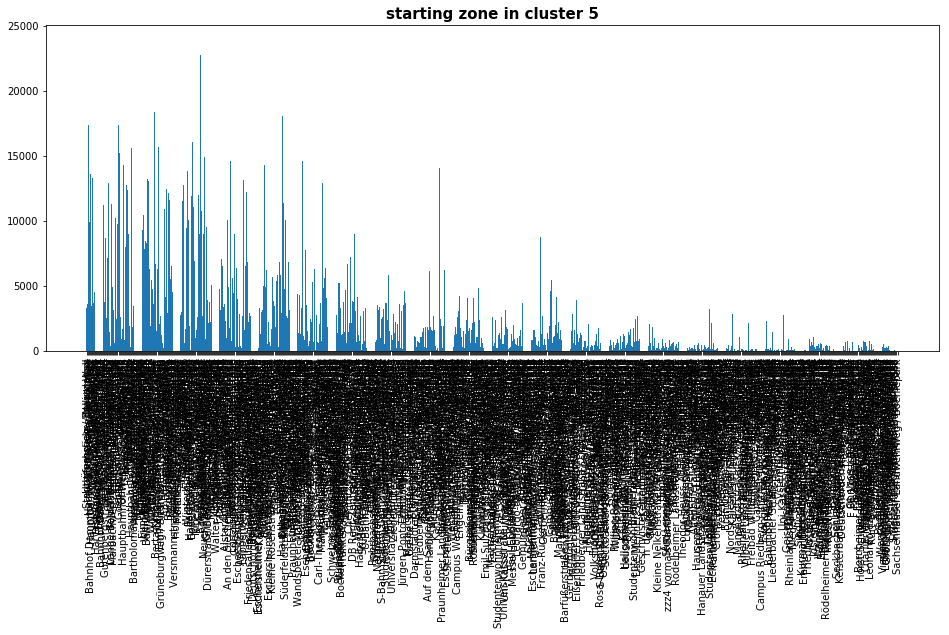

In [107]:
SZONE = cluster5.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster5[cluster5['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))


for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Bebelallee/Meenkwiese': 7894, 'Goldbekplatz / Semperstraße': 18442, 'Hauptbahnhof Ost / Hachmannplatz': 14326, 'Kellinghusenstraße / Loogeplatz': 8021, 'Feldstraße / Marktstraße': 11353, 'Uni-Kassel / Diagonale': 6666, 'Darmstadtium': 3218, 'Sievekingsallee/Sievekingdamm': 4481, 'Harvestehuder Weg / Alte Rabenstraße': 12287, 'Adalbertstraße / Schlossstraße': 1522, 'Goebenstraße/Eppendorfer Weg': 15514, 'Leinpfad/Fernsicht': 10303, 'Ginseldorfer Weg / Försterweg': 3704, 'Osterstraße/Bismarckstraße': 14539, 'St.Petersburger Straße/Bei den Kirchhöfen': 3293, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 13545, 'Versmannstraße/Am Hannoverschen Bahnhof': 3837, 'Saarlandstraße/Wiesendamm': 8345, 'Stadtbüro': 665, 'Konstablerwache': 7606, 'Messehallen / Marktstraße': 10135, 'Haltestelle Kirchweg/Wilhelmshöher Allee': 3422, 'Mombachstraße': 3465, 'Wandsbeker Chaussee/Ritterstraße': 6634, 'Schulterblatt/Eifflerstraße': 22969, 'Bahrenfelder Straße/Völckersstraße': 11446, 'Adlerwerke Kleyerstr

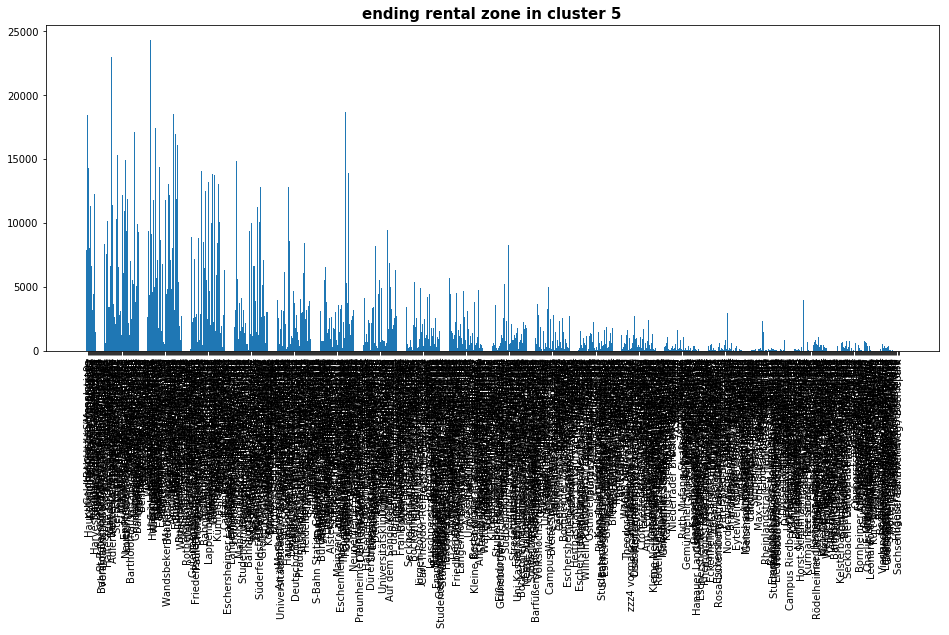

In [108]:
EZONE = cluster5.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster5[cluster5['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))


for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-6

In [109]:
cluster6 = cluster_2016[cluster_2016["labels"] == 6]
cluster6.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
138077,110994,Bahrenfelder Straße/Völckersstraße,Bahrenfelder Straße/Völckersstraße,Köln,iPhone,41923.966667,1,6
152679,116625,Osterstraße/Bismarckstraße,Goebenstraße/Eppendorfer Weg,Berlin,others,33605.800000,1,6
246961,109479,Heidelberger Straße 49,h_da / Campus - Mensa,Berlin,iPhone,54373.350000,2,6
292500,108521,Campus Riedberg Mensa,Hauptbahnhof,Berlin,others,47356.650000,2,6
320763,108073,Theodor-Heuss-Allee / Varrentrappstraße,Woolworth Leipziger Strasse,Berlin,Android,42916.266667,2,6


In [110]:
cluster6.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,38.000000,38.000000,38.000000,38.0
mean,130720.157895,41248.318421,3.921053,6.0
std,24525.939830,10014.826120,1.343283,0.0
min,106779.000000,27687.416667,1.000000,6.0
25%,109725.500000,32430.025000,3.000000,6.0
50%,118331.500000,41916.425000,4.500000,6.0
75%,163722.000000,47552.575000,5.000000,6.0
max,165820.000000,64241.100000,6.000000,6.0


['Köln' 'Berlin' 'Frankfurt am Main' 'Braunschweig' 'Bamberg' 'Darmstadt'
 'Gütersloh' 'Würzburg' 'Bremen' 'Halle' 'Warnemünde' 'Hamburg']
{'Köln': 1, 'Berlin': 12, 'Frankfurt am Main': 12, 'Braunschweig': 1, 'Bamberg': 1, 'Darmstadt': 2, 'Gütersloh': 1, 'Würzburg': 1, 'Bremen': 2, 'Halle': 1, 'Warnemünde': 1, 'Hamburg': 3}


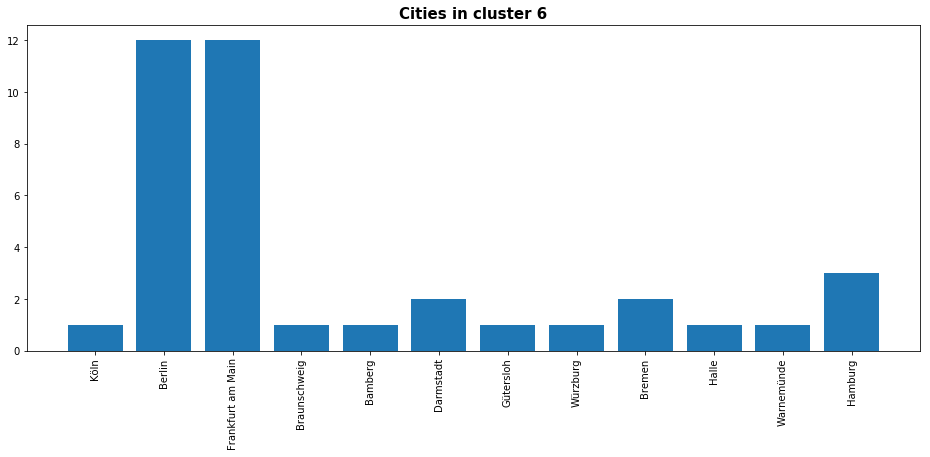

In [111]:

CITY = cluster6.CITY_RENTAL_ZONE.unique()
print(CITY)

city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster6[cluster6['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


[1 2 3 4 5 6]
{1: 2, 2: 5, 3: 7, 4: 5, 5: 18, 6: 1}


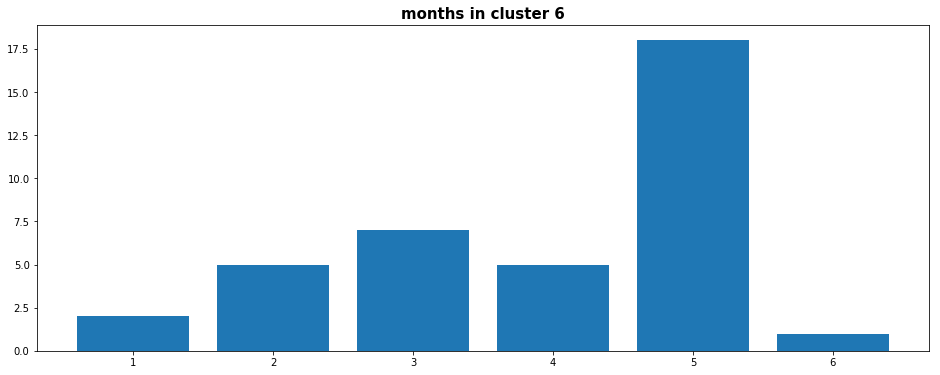

In [112]:
MONTH = cluster6.Month.unique()
print(MONTH)

month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster6[cluster6['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


['iPhone' 'others' 'Android' 'IVR']
{'iPhone': 14, 'others': 5, 'Android': 16, 'IVR': 3}


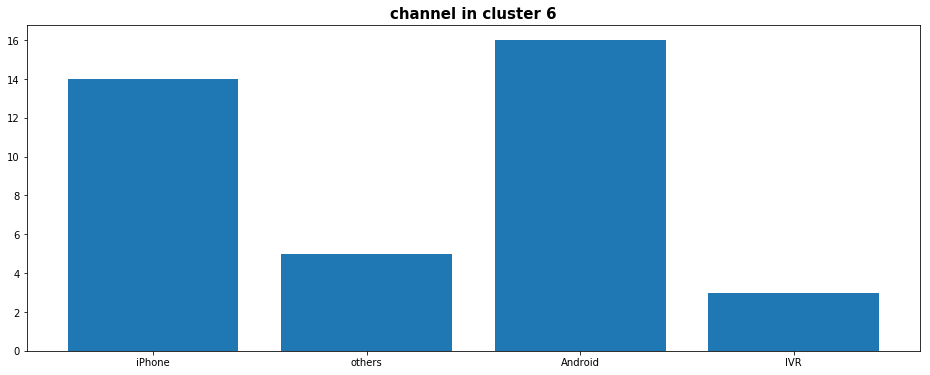

In [113]:
CHANNEL = cluster6.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster6[cluster6['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channel in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Bahrenfelder Straße/Völckersstraße': 1, 'Osterstraße/Bismarckstraße': 1, 'Heidelberger Straße 49': 1, 'Campus Riedberg Mensa': 1, 'Theodor-Heuss-Allee / Varrentrappstraße': 1, 'Römerberg': 1, 'Landungsbrücke/Hafentor': 1, 'BSC Grafittihalle': 2, 'An den Siechengärten / Alter Kirchhainer Weg': 1, 'Braunschweig Hbf': 1, 'Reeperbahn / Königstraße': 1, 'Bamberg Bf': 1, 'Hörsaalgebäude / Biegenstraße': 1, 'Gänsemarkt / Büschstraße': 1, 'Hochschulstadion': 1, 'Süderfeldstraße/Universitätsklinikum Eppendorf': 1, 'Gütersloh Hbf': 1, 'Hochschulstraße': 1, 'Saarlandstraße/Wiesendamm': 2, 'Würzburg Hbf': 1, 'Universitätsklinikum / Theodor-Stern-Kai': 1, 'Allende-Platz/Grindelhof': 1, 'Bremen Hbf': 2, 'Bernhard-Nocht-Straße/Zirkusweg': 1, 'Halle Universitätsring': 1, 'Warnemünde Bf': 1, 'S-Bahn Station Galluswarte / Mainzer Landstraße': 1, 'FSC Berlin Werkstatt LIDL-Bike': 1, 'Jürgen-Ponto-Platz / Neckarstraße (DB-Tower)': 1, 'Zentralbibliothek / Münzstraße': 1, 'h_da / Campus - Mensa': 1, 'Eiff

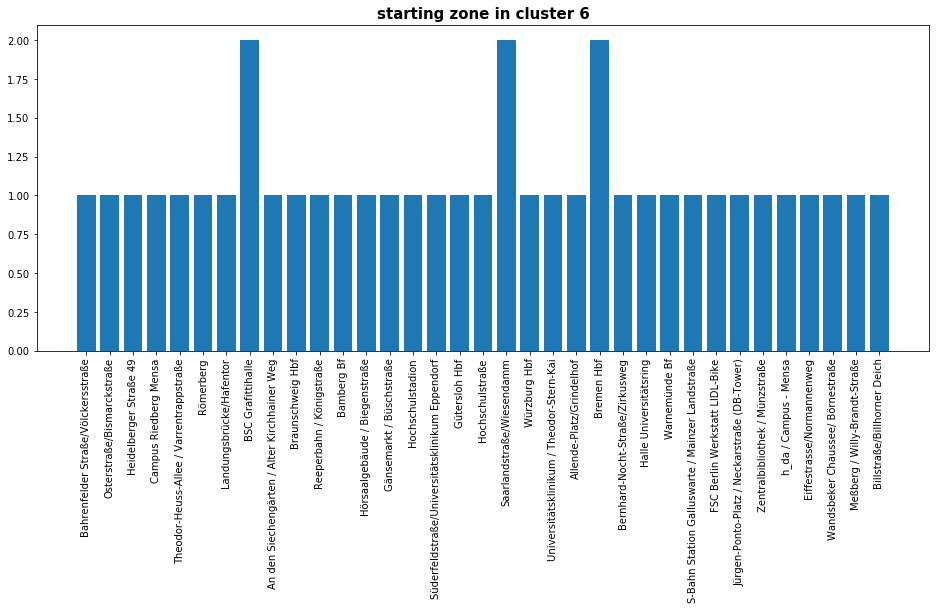

In [114]:
SZONE = cluster6.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster6[cluster6['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

'''
for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))
'''

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Bahrenfelder Straße/Völckersstraße': 1, 'Goebenstraße/Eppendorfer Weg': 1, 'h_da / Campus - Mensa': 1, 'Hauptbahnhof': 1, 'Woolworth Leipziger Strasse': 1, 'Uferstraße/Wagnerstraße': 1, 'Neumühlen/Övelgönne': 1, 'Bürgerhaus Wehrda / Huteweg': 1, 'Ortenbergplatz': 1, 'BSC Grafittihalle': 1, 'Braunschweig Hbf': 1, 'Große Bergstraße / Jessenstraße': 1, 'Bamberg Bf': 1, 'Gutenbergstraße / Fachbereich Psychologie': 1, 'h_da KITA / Bibliothek': 1, 'Landwehrstraße / Kasinostraße': 1, 'Kümmellstraße / Robert-Koch-Straße': 1, 'Gütersloh Hbf': 1, 'Frankfurter Landstraße / Ettesterstraße': 1, 'Jarrestraße / Rambatzweg': 1, 'Gänsemarkt / Büschstraße': 2, 'Goethestraße / Opernplatz': 1, 'Wilhelmsburger Platz/Zur Schleuse': 1, 'Bernhard-Nocht-Straße/Zirkusweg': 1, 'Friedrich-Ebert-Damm / Lomerstraße': 1, 'Schulterblatt/Eifflerstraße': 1, 'Halle Rudolf-Breitscheid-Straße': 1, 'Warnemünde Bf': 1, 'Idsteiner Straße / Eppenhainer Straße': 1, 'Südring/Stadthallenbrücke': 1, 'FSC Berlin Werkstatt LIDL-B

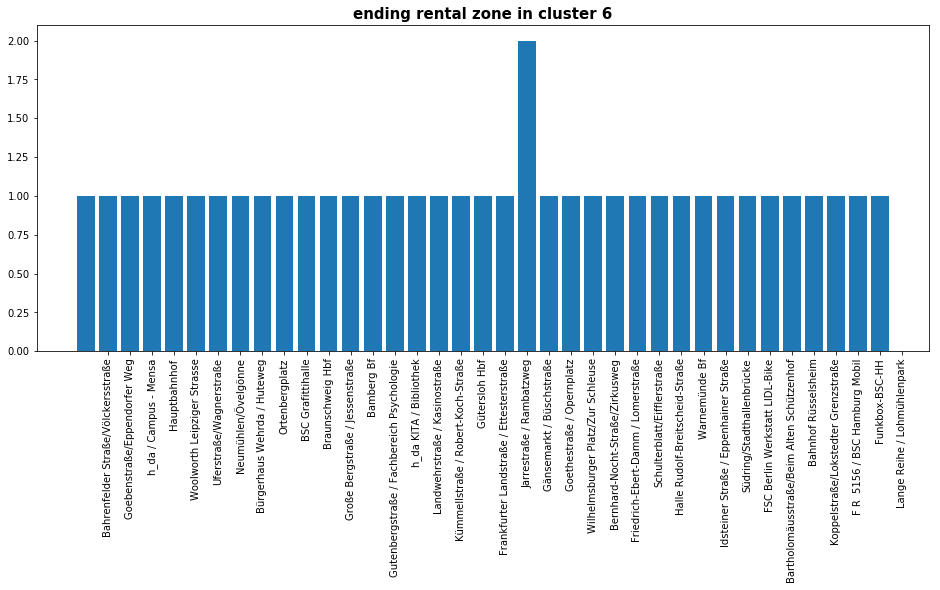

In [115]:
EZONE = cluster6.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster6[cluster6['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

'''
for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))
'''


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

* As must of the dataset goes in cluster-1 which is quite big in size
* So again we divide the cluster-1 into 7 small clusters.
* This is called Hierarchical clustering

In [ ]:
# As we already used categorical features and they are already encoded. So we use kmeans algorithm for clustering.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)  
pr_out = kmeans.fit(plot_columns)
#plot_columns

In [ ]:
pr_out = kmeans.transform(plot_columns)

In [ ]:
colors = ['red','green','purple','blue','cyan','black','pink','brown','yellow']

In [ ]:
kmeans.labels_

In [ ]:
len(plot_columns)

In [ ]:
# plotting the sub-clusters 

plt.scatter(plot_columns[:,0],plot_columns[:,1],c=[colors[l] for l in kmeans.labels_])
#plt.show()

In [ ]:
plt.savefig('hierarchial_clustering.png')

* Here we see that the dataset are easily separable by the cluster labels.